# Read the data and clean:

* Summery of what I did:
  1. Count the unique groups based on TTT and LOS to validate the data.
  2. Cut the dataframe to all index groups 1-50 and TTT is 1-20.

In [28]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neural_network import MLPRegressor
from sklearn.impute import SimpleImputer
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
df1 = pd.read_csv(r"C:\Users\User\Desktop\booking\booking_hotels_clean_data_20_06.csv")
df2 = pd.read_csv(r"C:\Users\User\Desktop\booking\booking_hotels_clean_data_25_06.csv")
df3 = pd.read_csv(r"C:\Users\User\Desktop\booking\booking_hotels_clean_data_05_07.csv")

# Merge the dataframes
# df = pd.concat([df1, df2, df3], ignore_index=True)
df = df1.copy()

In [29]:
df = df.drop("Snapshot", axis=1)

In [30]:
df.columns

Index(['name', 'location', 'score', 'reviews', 'room_type', 'bed_type',
       'price', 'availability', 'url', 'star_rating', 'location_rating',
       'Free_cancellation', 'No_prepayment', 'Limited_rooms', 'TTT',
       'Breakfast', 'index', 'neighborhood', 'km_from_center', 'LOS',
       'price_per_night', 'room_rate', 'neighborhood_category'],
      dtype='object')

In [31]:
df = df.sort_values(by=["TTT", "LOS", "index"])

In [33]:
# Function to fill NaN values with the mean of the group
def fill_na_with_group_mean(df):
    numeric_cols = df.select_dtypes(include=[np.number]).columns
    for col in numeric_cols:
        df[col].fillna(df[col].mean(), inplace=True)
    return df

# Fill NaN values for the entire dataset
df = fill_na_with_group_mean(df)

In [34]:
df

,name,location,score,reviews,room_type,bed_type,price,availability,url,star_rating,...,Limited_rooms,TTT,Breakfast,index,neighborhood,km_from_center,LOS,price_per_night,room_rate,neighborhood_category
0,U.S. Pacific Hotel,NaN,5.6,2437.0,Standard Double (No Window),New YorkShow on map5.7 km from centreMetro ac...,129.0,"1 night, 2 adults",https://www.booking.com/hotel/us/us-pacific.en...,1.000000,...,4,1,0,1,Chinatown,5.70,1,129.0,1,Downtown Manhattan
1,Hudson Yard 408,NaN,4.9,42.0,Double Room,New YorkShow on map1.9 km from centreMetro ac...,158.0,"1 night, 2 adults",https://www.booking.com/hotel/us/hudson-new-yo...,3.399116,...,2,1,0,2,Hudson Yards,1.90,1,158.0,1,Midtown Manhattan
2,Carlton Arms Hotel,NaN,7.4,1978.0,Double Room with Shared Bathroom,New YorkShow on map3.1 km from centreMetro ac...,161.0,"1 night, 2 adults",https://www.booking.com/hotel/us/carlton-arms....,2.000000,...,3,1,0,3,Gramercy,3.10,1,161.0,1,Midtown Manhattan
3,Bowery Grand Hotel,NaN,3.5,1406.0,Standard Single Room with Shared Bathroom,New YorkShow on map5.6 km from centreMetro ac...,189.0,"1 night, 2 adults",https://www.booking.com/hotel/us/bowery-grand....,1.000000,...,0,1,0,4,Lower East Side,5.60,1,189.0,1,Downtown Manhattan
4,West Side YMCA,NaN,6.6,13556.0,Bunk Bed Room with Shared Bathroom,New YorkShow on map350 m from centreMetro access,169.0,"1 night, 2 adults",https://www.booking.com/hotel/us/west-side-ymc...,3.000000,...,5,1,0,5,Upper West Side,0.35,1,169.0,0,Uptown Manhattan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23678,Fairfield Inn & Suites by Marriott New York Ma...,NaN,8.2,6793.0,1 King Bed,New YorkShow on map1.9 km from centreMetro ac...,1506.0,"5 nights, 2 adults",https://www.booking.com/hotel/us/fairfield-inn...,4.000000,...,5,30,1,165,Hell's Kitchen,1.90,5,301.2,3,Midtown Manhattan
23679,Freehand New York,NaN,7.8,1877.0,Premium Queen,New YorkShow on map3.1 km from centreMetro ac...,1511.0,"5 nights, 2 adults",https://www.booking.com/hotel/us/freehand-new-...,4.000000,...,0,30,0,166,Gramercy,3.10,5,302.2,2,Midtown Manhattan
23680,American Dream Guest House,NaN,9.0,4.0,Double Room with Shared Bathroom,New YorkShow on map1.1 km from centre,1511.0,"5 nights, 2 adults",https://www.booking.com/hotel/us/american-drea...,3.399116,...,1,30,0,167,Hell's Kitchen,1.10,5,302.2,1,Midtown Manhattan
23681,Courtyard by Marriott Times Square West,NaN,8.2,2796.0,King Room,New YorkShow on map1.8 km from centreMetro ac...,1514.0,"5 nights, 2 adults",https://www.booking.com/hotel/us/new-york-manh...,3.000000,...,5,30,0,168,Hell's Kitchen,1.80,5,302.8,3,Midtown Manhattan


In [35]:
unique_groups_count = df.groupby(['TTT', 'LOS']).ngroups

In [36]:
unique_groups_count

150

In [37]:
# Filter the dataset to include TTT between 1 and 20 and Index between 1 and 50
df = df[(df['TTT'] >= 1) & (df['TTT'] <= 20) & (df['index'] >= 1) & (df['index'] <= 50)]
model_trainning_data = df[(df['TTT'] >= 1) & (df['TTT'] <= 20) & (df['index'] >= 1) & (df['index'] <= 15)]

In [38]:
df.groupby(['TTT', 'LOS']).ngroups

100

# Preprocess Data

* summery of what I did:
  1. Split the dataframe to 2 parts:
     * Even TTT - for the train
     * Odd TTT - for the test

In [39]:
df["index"].max()

50

In [40]:
model_trainning_data["index"].max()

15

In [41]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Split data into training and test sets based on TTT values
even_ttt = model_trainning_data[model_trainning_data['TTT'] % 2 == 0]
odd_ttt = model_trainning_data[model_trainning_data['TTT'] % 2 != 0]

print(f"sum of EVEN TTT unique groups: {even_ttt.groupby(['TTT', 'LOS']).ngroups}")
print(f"sum of ODD TTT unique groups: {odd_ttt.groupby(['TTT', 'LOS']).ngroups}")

# Select n unique groups for training
train_groups = even_ttt.groupby(['TTT', 'LOS']).size().reset_index().sample(n=50)
train_data = pd.merge(even_ttt, train_groups, on=['TTT', 'LOS'])

# Select n unique groups for testing
test_groups = odd_ttt.groupby(['TTT', 'LOS']).size().reset_index().sample(n=20)
test_data = pd.merge(odd_ttt, test_groups, on=['TTT', 'LOS'])

sum of EVEN TTT unique groups: 50
sum of ODD TTT unique groups: 50


In [42]:
train_data

,name,location,score,reviews,room_type,bed_type,price,availability,url,star_rating,...,TTT,Breakfast,index,neighborhood,km_from_center,LOS,price_per_night,room_rate,neighborhood_category,0
0,U.S. Pacific Hotel,NaN,5.6,2437.0,Standard Double (No Window),New YorkShow on map5.7 km from centreMetro ac...,140.0,"1 night, 2 adults",https://www.booking.com/hotel/us/us-pacific.en...,1.000000,...,2,0,1,Chinatown,5.7,1,140.0,1,Downtown Manhattan,15
1,Hudson Yard 408,NaN,4.9,42.0,Double Room,New YorkShow on map1.9 km from centreMetro ac...,168.0,"1 night, 2 adults",https://www.booking.com/hotel/us/hudson-new-yo...,3.399116,...,2,0,2,Hudson Yards,1.9,1,168.0,1,Midtown Manhattan,15
2,Hotel Moca NYC,NaN,4.4,97.0,Deluxe Queen Room,New YorkShow on map9.9 km from centreMetro ac...,230.0,"1 night, 2 adults",https://www.booking.com/hotel/us/moca-nyc.en-g...,3.000000,...,2,0,3,Washington Heights,9.9,1,230.0,2,Uptown Manhattan,15
3,31 Street Broadway Hotel,NaN,4.5,511.0,Classic Quadruple Room,New YorkShow on map2.4 km from centreMetro ac...,310.0,"1 night, 2 adults",https://www.booking.com/hotel/us/1234-broadway...,2.000000,...,2,0,4,NoMad,2.4,1,310.0,0,Downtown Manhattan,15
4,"U Hotel Fifth Avenue, Empire State Building",NaN,7.9,3051.0,Queen Room,New YorkShow on map2.1 km from centreMetro ac...,315.0,"1 night, 2 adults",https://www.booking.com/hotel/us/373.en-gb.htm...,3.000000,...,2,0,5,Manhattan,2.1,1,315.0,2,Other Manhattan,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
743,queen size room with shared bathroom,NaN,8.6,14.0,Double Room,New YorkShow on map6.7 km from centreMetro ac...,925.0,"5 nights, 2 adults",https://www.booking.com/hotel/us/medium-room-i...,3.000000,...,20,0,11,Harlem,6.7,5,185.0,1,Uptown Manhattan,15
744,East Harlem Hostel,NaN,8.3,72.0,Queen Room with Shared Bathroom,New YorkShow on map4.8 km from centreMetro ac...,931.0,"5 nights, 2 adults",https://www.booking.com/hotel/us/the-neighborh...,3.399116,...,20,0,12,East Harlem,4.8,5,186.2,2,Uptown Manhattan,15
745,Hotel 309,NaN,6.1,1511.0,Economy Room with Shared Bath,New YorkShow on map3.6 km from centreMetro ac...,952.0,"5 nights, 2 adults",https://www.booking.com/hotel/us/309.en-gb.htm...,2.000000,...,20,0,13,Chelsea,3.6,5,190.4,2,Midtown Manhattan,15
746,Macaw Guest House,NaN,5.8,48.0,Deluxe Double Room,New YorkShow on map3.6 km from centreMetro ac...,962.0,"5 nights, 2 adults",https://www.booking.com/hotel/us/macaw-guest-h...,3.399116,...,20,0,14,East Harlem,3.6,5,192.4,2,Uptown Manhattan,15


In [43]:
test_data

,name,location,score,reviews,room_type,bed_type,price,availability,url,star_rating,...,TTT,Breakfast,index,neighborhood,km_from_center,LOS,price_per_night,room_rate,neighborhood_category,0
0,U.S. Pacific Hotel,NaN,5.600000,2437.000000,Standard Double (No Window),New YorkShow on map5.7 km from centreMetro ac...,129.0,"1 night, 2 adults",https://www.booking.com/hotel/us/us-pacific.en...,1.000000,...,1,0,1,Chinatown,5.70,1,129.00,1,Downtown Manhattan,15
1,Hudson Yard 408,NaN,4.900000,42.000000,Double Room,New YorkShow on map1.9 km from centreMetro ac...,158.0,"1 night, 2 adults",https://www.booking.com/hotel/us/hudson-new-yo...,3.399116,...,1,0,2,Hudson Yards,1.90,1,158.00,1,Midtown Manhattan,15
2,Carlton Arms Hotel,NaN,7.400000,1978.000000,Double Room with Shared Bathroom,New YorkShow on map3.1 km from centreMetro ac...,161.0,"1 night, 2 adults",https://www.booking.com/hotel/us/carlton-arms....,2.000000,...,1,0,3,Gramercy,3.10,1,161.00,1,Midtown Manhattan,15
3,Bowery Grand Hotel,NaN,3.500000,1406.000000,Standard Single Room with Shared Bathroom,New YorkShow on map5.6 km from centreMetro ac...,189.0,"1 night, 2 adults",https://www.booking.com/hotel/us/bowery-grand....,1.000000,...,1,0,4,Lower East Side,5.60,1,189.00,1,Downtown Manhattan,15
4,West Side YMCA,NaN,6.600000,13556.000000,Bunk Bed Room with Shared Bathroom,New YorkShow on map350 m from centreMetro access,169.0,"1 night, 2 adults",https://www.booking.com/hotel/us/west-side-ymc...,3.000000,...,1,0,5,Upper West Side,0.35,1,169.00,0,Uptown Manhattan,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,31 Street Broadway Hotel,NaN,4.500000,511.000000,Apartment With Shared Bathroom,New YorkShow on map2.4 km from centreMetro ac...,888.0,"4 nights, 2 adults",https://www.booking.com/hotel/us/1234-broadway...,2.000000,...,19,0,11,NoMad,2.40,4,222.00,0,Downtown Manhattan,15
296,Hotel 309,NaN,6.100000,1511.000000,Economy Room with Shared Bath,New YorkShow on map3.6 km from centreMetro ac...,737.0,"4 nights, 2 adults",https://www.booking.com/hotel/us/309.en-gb.htm...,2.000000,...,19,0,12,Chelsea,3.60,4,184.25,2,Midtown Manhattan,15
297,The Central Park by Broadway,NaN,7.657513,2621.448436,Double Room with Shared Bathroom,New YorkShow on map3.7 km from centreMetro ac...,743.0,"4 nights, 2 adults",https://www.booking.com/hotel/us/the-central-p...,3.399116,...,19,0,13,Upper West Side,3.70,4,185.75,1,Uptown Manhattan,15
298,Hotel Moca NYC,NaN,4.400000,97.000000,Deluxe Queen Room,New YorkShow on map9.9 km from centreMetro ac...,745.0,"4 nights, 2 adults",https://www.booking.com/hotel/us/moca-nyc.en-g...,3.000000,...,19,0,14,Washington Heights,9.90,4,186.25,2,Uptown Manhattan,15


# Model Training

* Summery of what I did:

  1. I choose the features that I want to based on in my model: 'full_price', 'km_from_center', 'star_rating', 'reviews', 'score','discount_perc', 'location_rating'.
  2. Run desicion tree model while the train_x value is the data from the features I coohse before, and train_y is the boolian value of the diff between each 2 rows.

In [44]:
test_data.columns

Index([                 'name',              'location',
                       'score',               'reviews',
                   'room_type',              'bed_type',
                       'price',          'availability',
                         'url',           'star_rating',
             'location_rating',     'Free_cancellation',
               'No_prepayment',         'Limited_rooms',
                         'TTT',             'Breakfast',
                       'index',          'neighborhood',
              'km_from_center',                   'LOS',
             'price_per_night',             'room_rate',
       'neighborhood_category',                       0],
      dtype='object')

In [45]:
# Define features and target for the model
features = ['price', 'km_from_center', 'star_rating', 'reviews', 'score', 'location_rating']
train_X = train_data[features]
train_y = (train_data['index'].diff().shift(-1) < 0).astype(int)

In [46]:
# Train the Decision Tree Classifier
clf = DecisionTreeClassifier()
clf.fit(train_X, train_y)

DecisionTreeClassifier()

# Sorting Function:

* Summery of what I did:
  1. compare_hotels():
     * Receives 2 hotels (pairs), and returns the predection based on the desicion tree model that I created before and returns 1 or -1.
  2. bubble_sort_hotels():
     * the function receives hotels dataframe and returns the sorted datarframe based on the model.
       

In [50]:
# Function to compare two hotels using the trained model
def compare_hotels(hotel1, hotel2):
    features = ['price', 'km_from_center', 'star_rating', 'reviews', 'score', 'location_rating']
    pair = pd.DataFrame([hotel1[features], hotel2[features]])
    prediction = clf.predict(pair)
    # If prediction[0] is 1, it returns 1, indicating that the first hotel should appear after the second hotel.
    # If prediction[0] is 0, it returns -1, indicating that the first hotel should appear before the second hotel.
    return 1 if prediction[0] else -1

# Bubble Sort using the model
def bubble_sort_hotels(hotels):
    n = len(hotels)
    for i in range(n):
        for j in range(0, n-i-1):
            if compare_hotels(hotels.iloc[j], hotels.iloc[j+1]) == -1:
                hotels.iloc[j], hotels.iloc[j+1] = hotels.iloc[j+1], hotels.iloc[j]
    return hotels

# Performance Evaluation:
* Summery of what I did:
  1. Shuffel the test data
  2. Sort the shffeled data with the model and bubble sort function.
  3. calculate the diff between the the sorted indexes and the original indexes
  4. calculate the avg and std. 

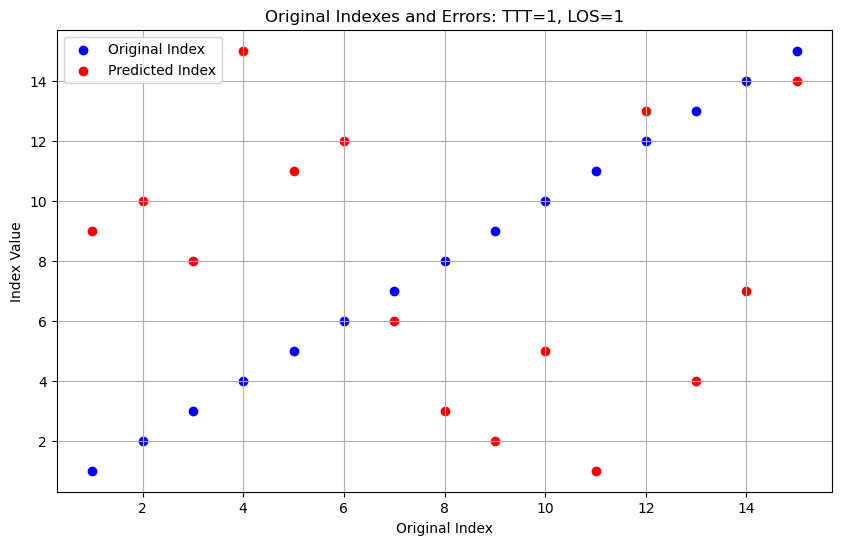

Accuracy rate for group TTT=1, LOS=1: 0.50


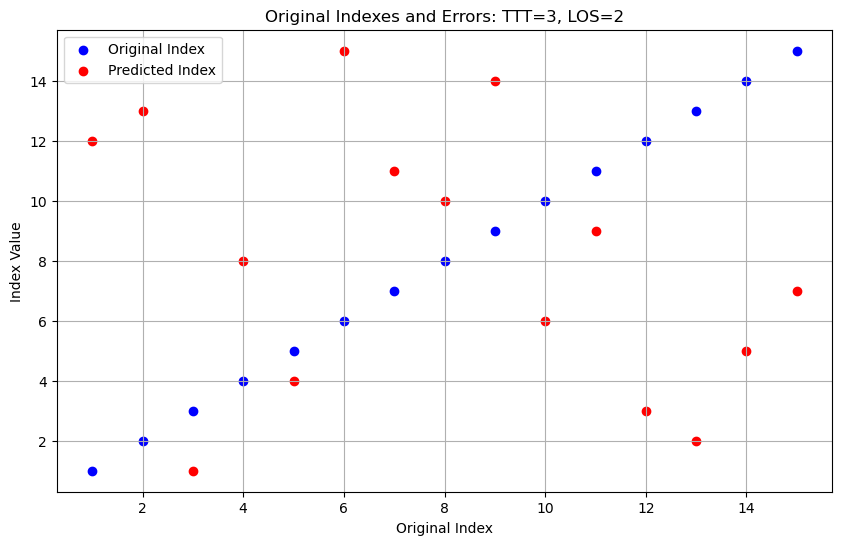

Accuracy rate for group TTT=3, LOS=2: 0.50


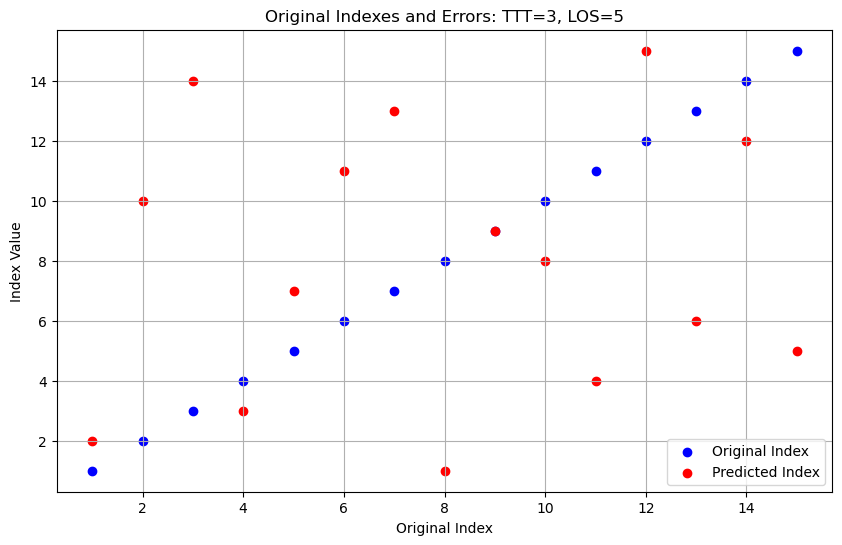

Accuracy rate for group TTT=3, LOS=5: 0.57


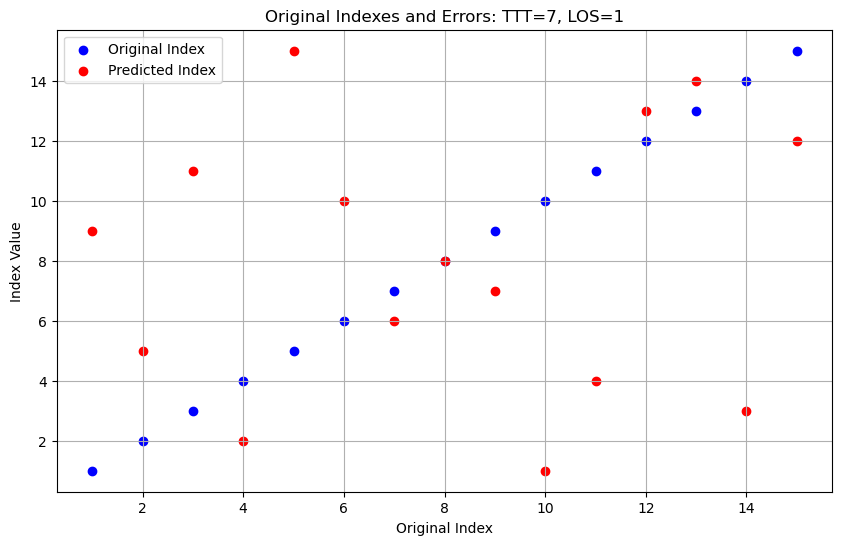

Accuracy rate for group TTT=7, LOS=1: 0.50


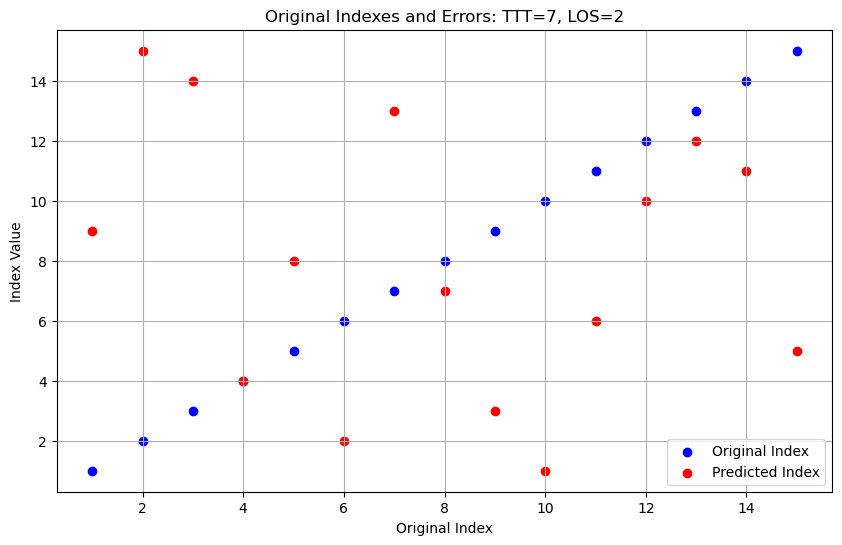

Accuracy rate for group TTT=7, LOS=2: 0.43


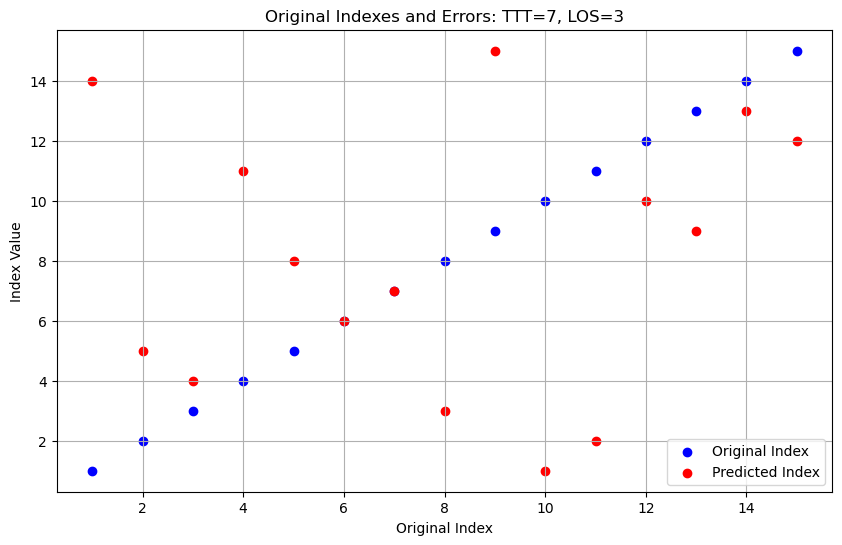

Accuracy rate for group TTT=7, LOS=3: 0.43


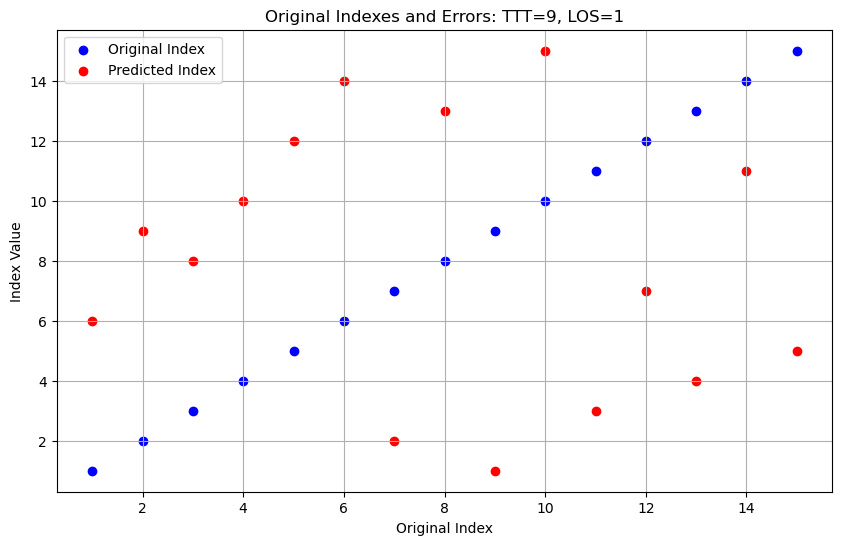

Accuracy rate for group TTT=9, LOS=1: 0.57


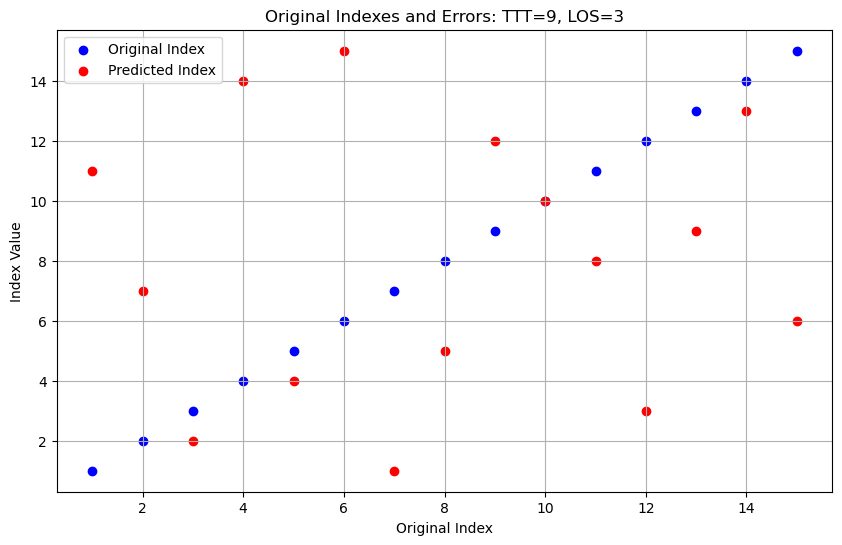

Accuracy rate for group TTT=9, LOS=3: 0.43


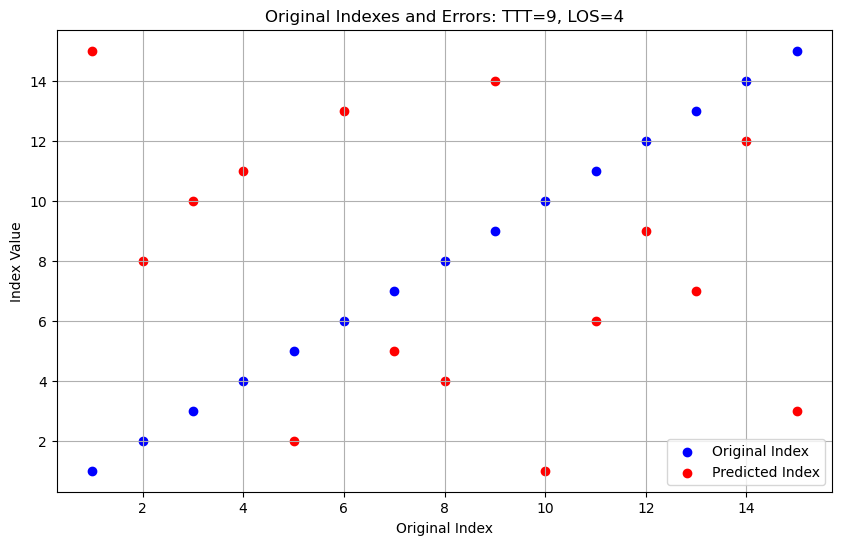

Accuracy rate for group TTT=9, LOS=4: 0.50


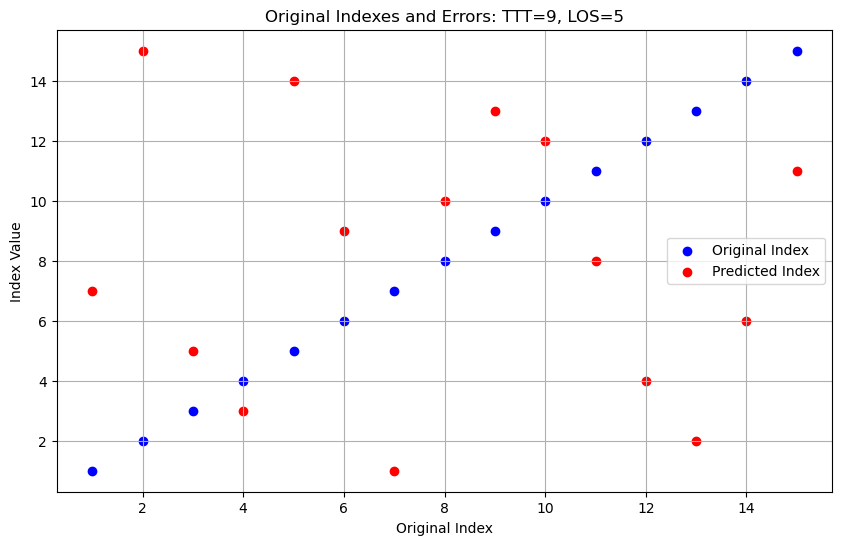

Accuracy rate for group TTT=9, LOS=5: 0.43


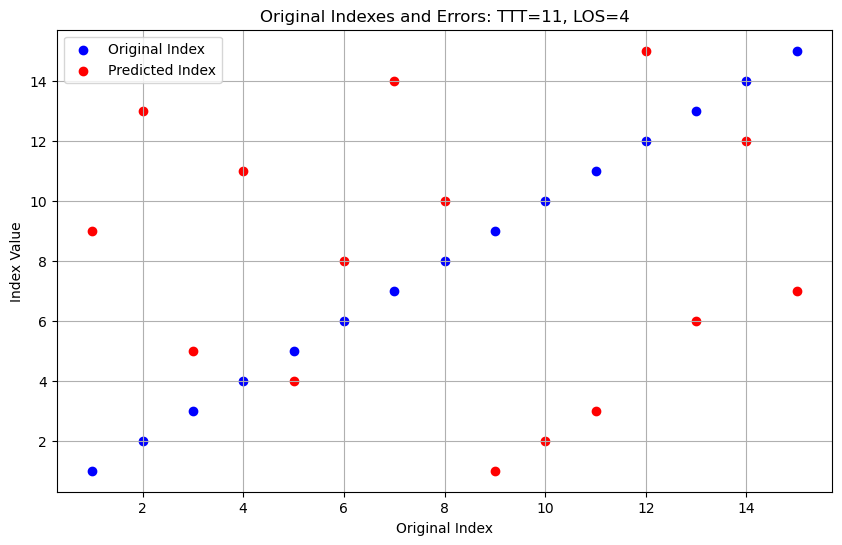

Accuracy rate for group TTT=11, LOS=4: 0.57


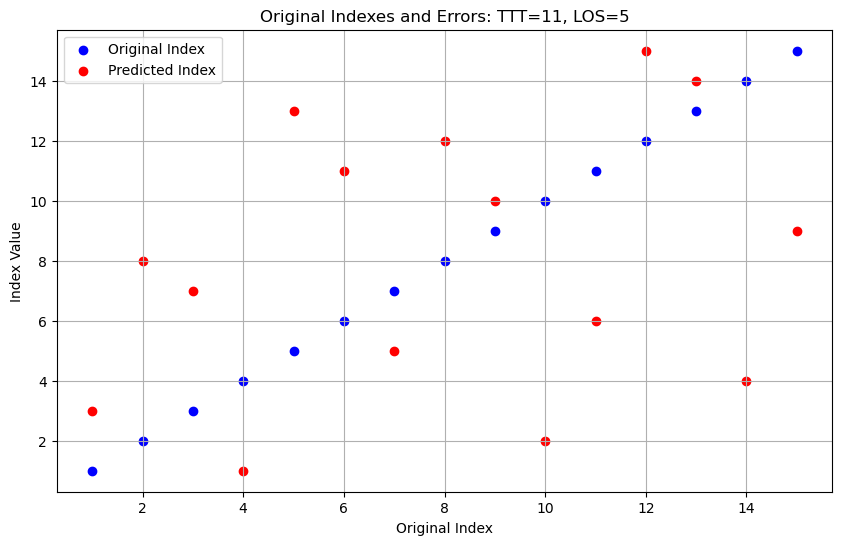

Accuracy rate for group TTT=11, LOS=5: 0.43


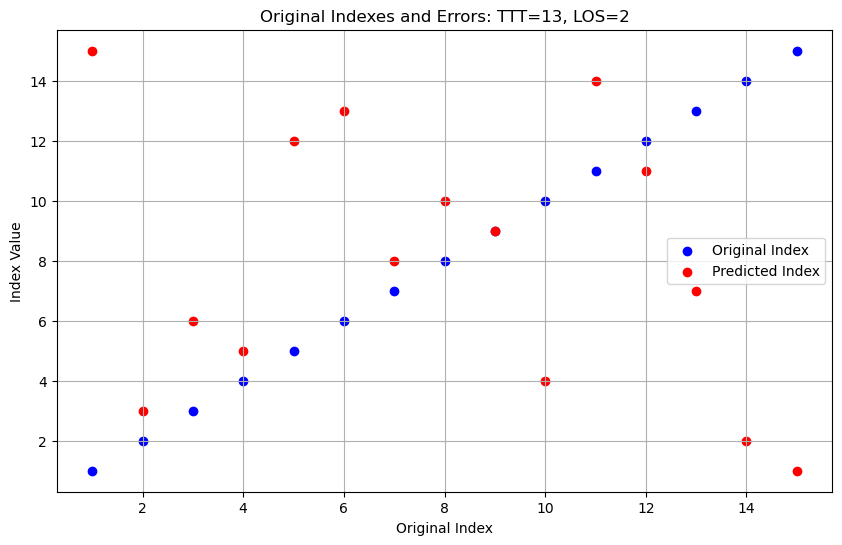

Accuracy rate for group TTT=13, LOS=2: 0.36


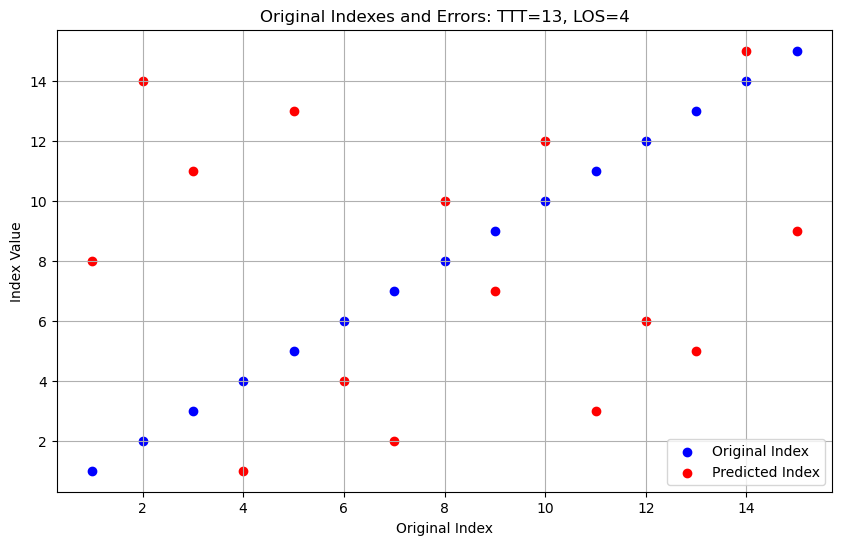

Accuracy rate for group TTT=13, LOS=4: 0.43


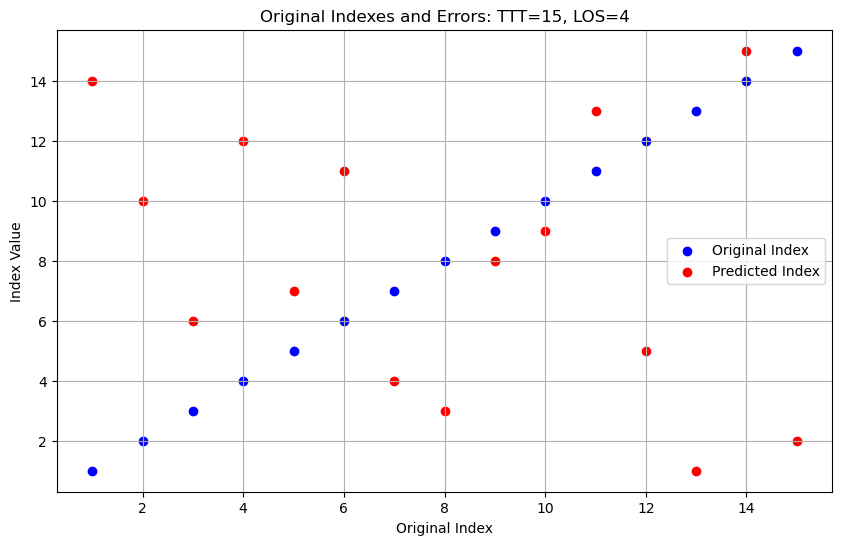

Accuracy rate for group TTT=15, LOS=4: 0.43


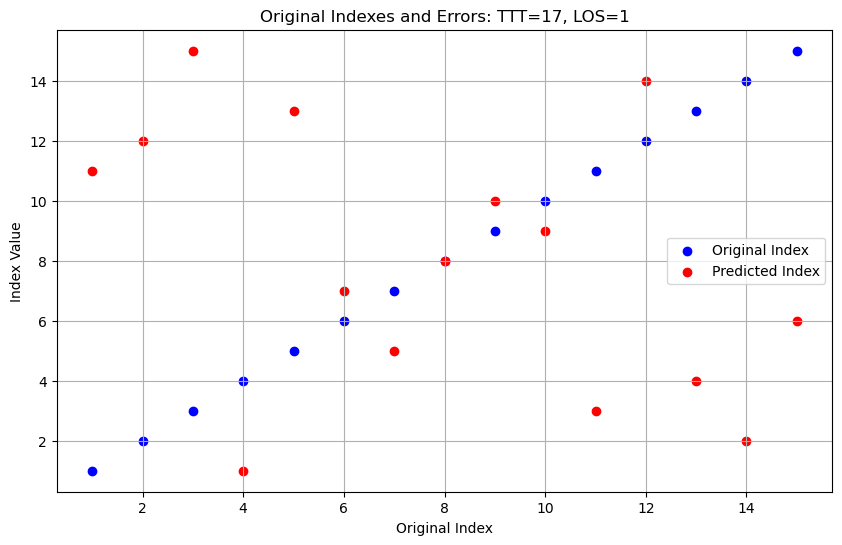

Accuracy rate for group TTT=17, LOS=1: 0.50


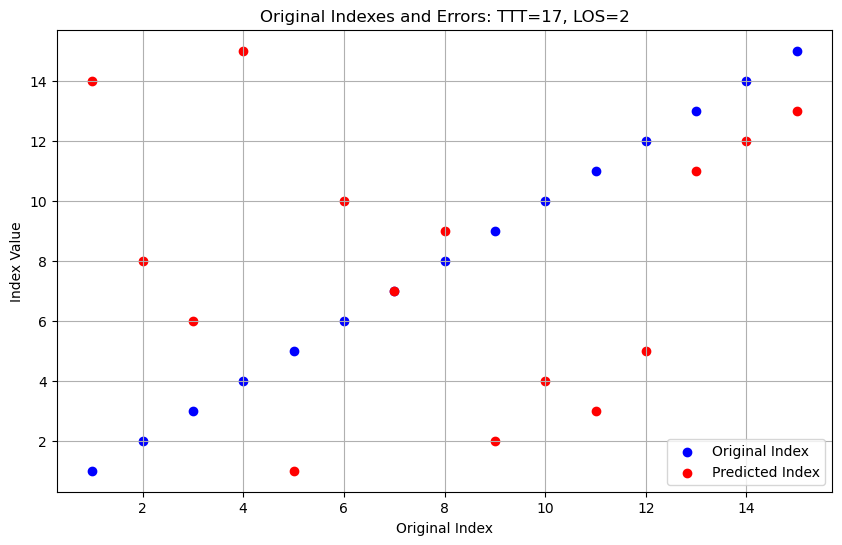

Accuracy rate for group TTT=17, LOS=2: 0.57


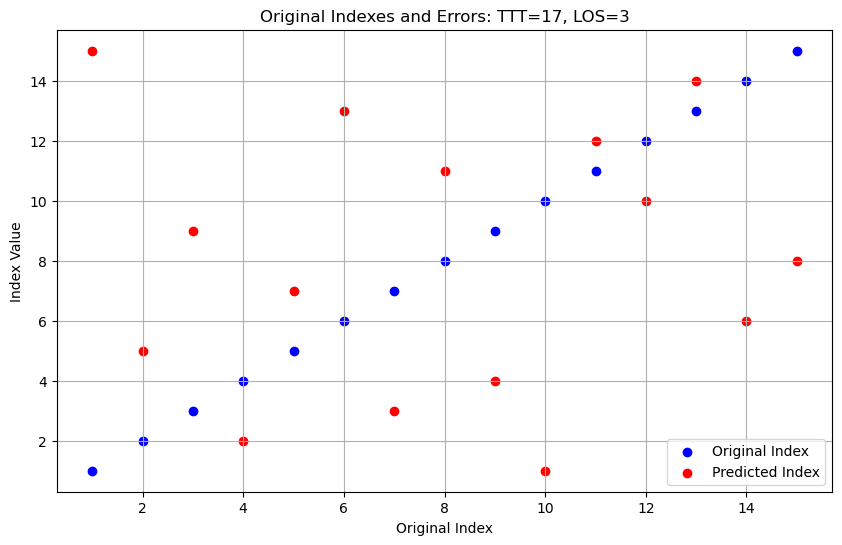

Accuracy rate for group TTT=17, LOS=3: 0.50


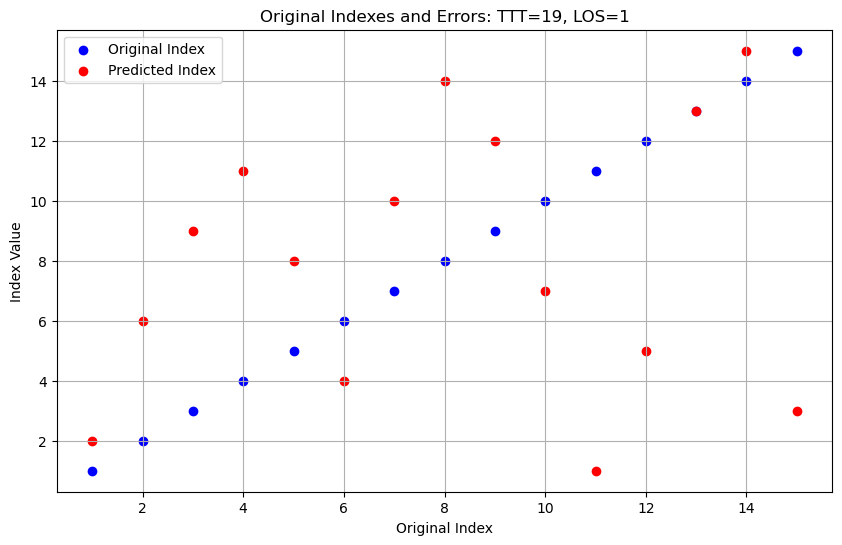

Accuracy rate for group TTT=19, LOS=1: 0.57


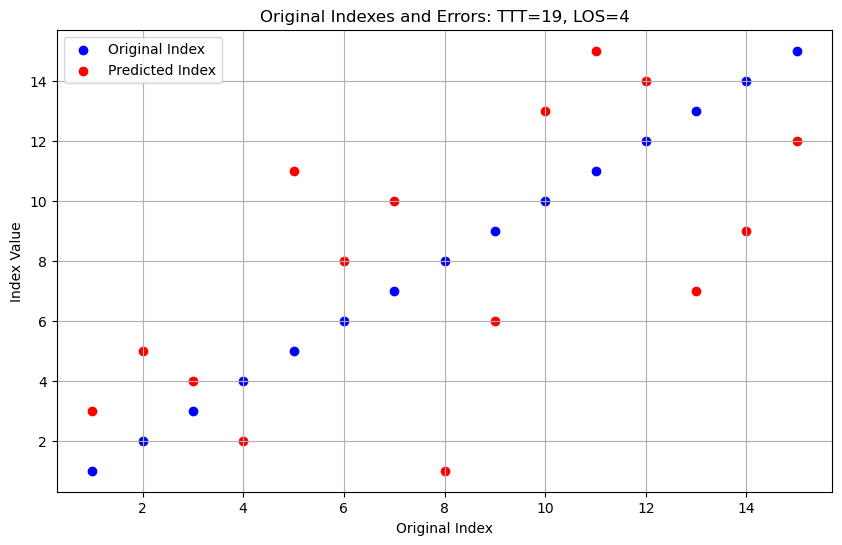

Accuracy rate for group TTT=19, LOS=4: 0.57


In [52]:
# Calculate the sum of squared index differences
errors = []
all_original_indices = []
all_sorted_indices = []
accuracy_rates= []


for name, group in test_data.groupby(['TTT', 'LOS']):
    original_indices = group['index'].values
    shuffled_group = group.sample(frac=1).reset_index(drop=True)
    sorted_group = bubble_sort_hotels(shuffled_group)
    sorted_indices = sorted_group['index'].values
    error = np.sum((sorted_indices - original_indices)**2)
    errors.append(error)

    # Calculate accuracy
    correct_predictions = sum((sorted_indices[i] < sorted_indices[i+1]) == (original_indices[i] < original_indices[i+1])
                              for i in range(len(sorted_indices) - 1))
    accuracy_rate = correct_predictions / (len(sorted_indices) - 1)
    accuracy_rates.append(accuracy_rate)

    # Plot the original indexes as blue points and the errors as red points for each original index
    plt.figure(figsize=(10, 6))
    plt.scatter(original_indices, original_indices, color='blue', label='Original Index')
    plt.scatter(original_indices, sorted_indices, color='red', label='Predicted Index')
    plt.title(f'Original Indexes and Errors: TTT={group["TTT"].values[0]}, LOS={group["LOS"].values[0]}')
    plt.xlabel('Original Index')
    plt.ylabel('Index Value')
    plt.legend()
    plt.grid(True)
    plt.show()

    print(f"Accuracy rate for group TTT={group['TTT'].values[0]}, LOS={group['LOS'].values[0]}: {accuracy_rate:.2f}")


    all_original_indices.extend(original_indices)
    all_sorted_indices.extend(sorted_indices)

# Calculate the average and standard deviation of errors
avg_error = np.mean(errors)
std_error = np.std(errors)

In [53]:
# Display the results
print(f'Average Error: {avg_error}')
print(f'Standard Deviation of Errors: {std_error}')

Average Error: 595.2
Standard Deviation of Errors: 134.01701384525774


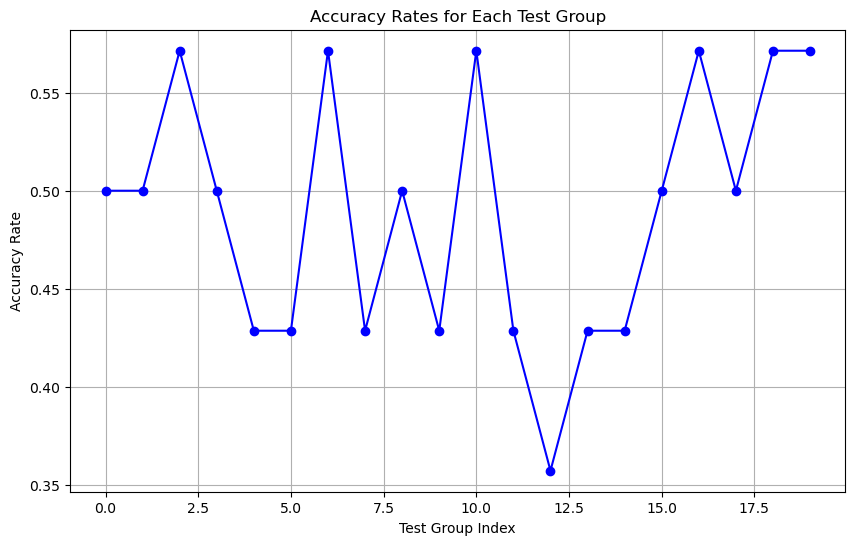

In [54]:
# Plot the overall accuracy rates
plt.figure(figsize=(10, 6))
plt.plot(range(len(accuracy_rates)), accuracy_rates, marker='o', linestyle='-', color='blue')
plt.title('Accuracy Rates for Each Test Group')
plt.xlabel('Test Group Index')
plt.ylabel('Accuracy Rate')
plt.grid(True)
plt.show()

C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


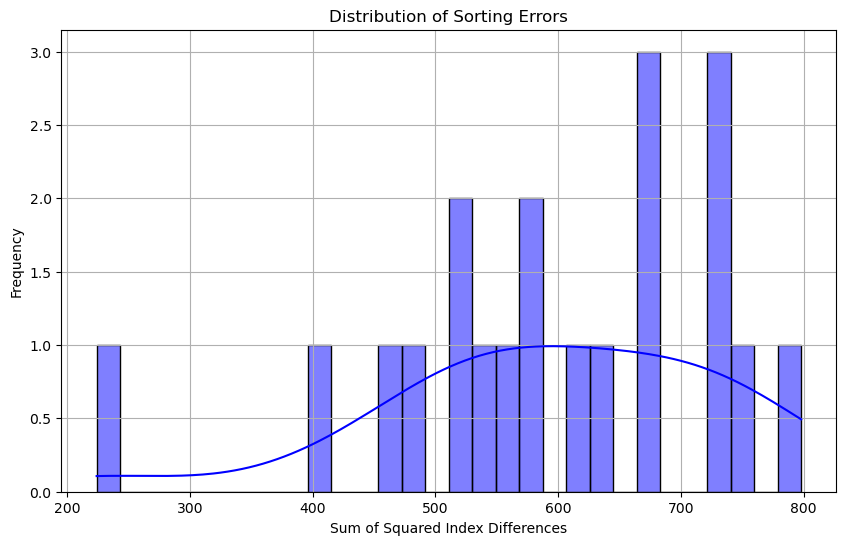

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'errors' list is already calculated as before

# Plot the errors using a histogram
plt.figure(figsize=(10, 6))
sns.histplot(errors, kde=True, bins=30, color='blue')
plt.title('Distribution of Sorting Errors')
plt.xlabel('Sum of Squared Index Differences')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

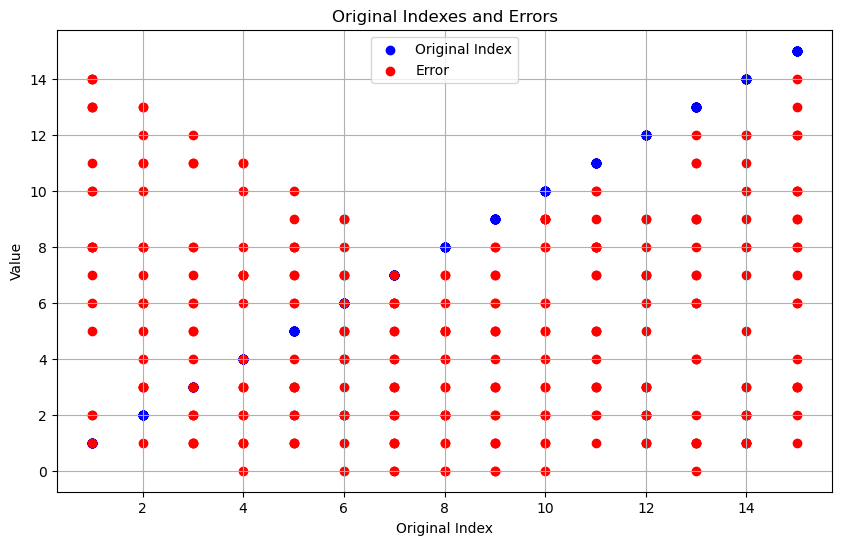

In [58]:
# Plot the original indexes as blue points and the errors as red points for each original index
plt.figure(figsize=(10, 6))
plt.scatter(all_original_indices, all_original_indices, color='blue', label='Original Index')
plt.scatter(all_original_indices, np.abs(np.array(all_original_indices) - np.array(all_sorted_indices)), color='red', label='Error')
plt.title('Original Indexes and Errors')
plt.xlabel('Original Index')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()

# Repeat on the proccess testing decision tree model on the pages data

sum of EVEN TTT unique groups: 50
sum of ODD TTT unique groups: 50


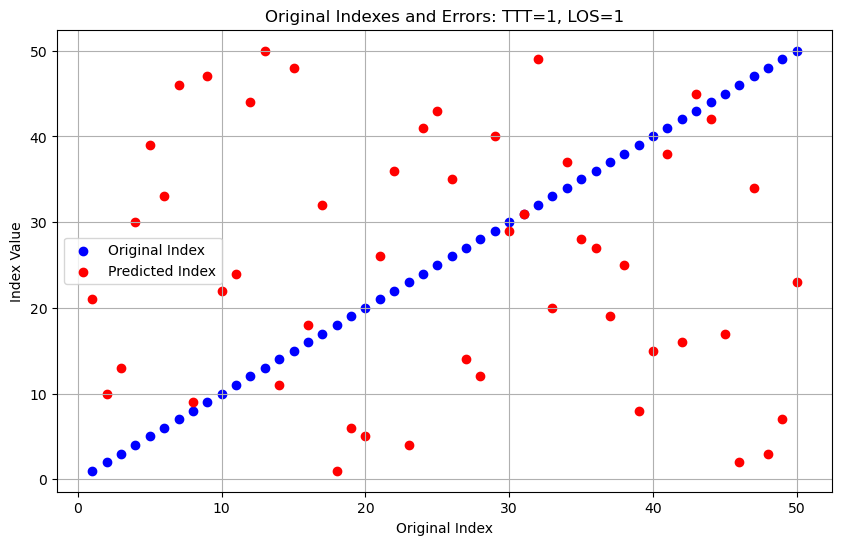

Accuracy rate for group TTT=1, LOS=1: 0.53


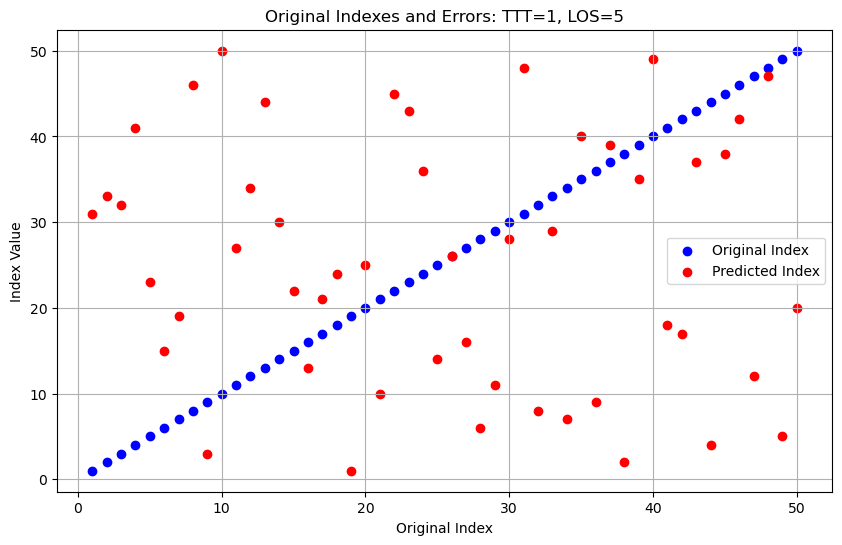

Accuracy rate for group TTT=1, LOS=5: 0.51


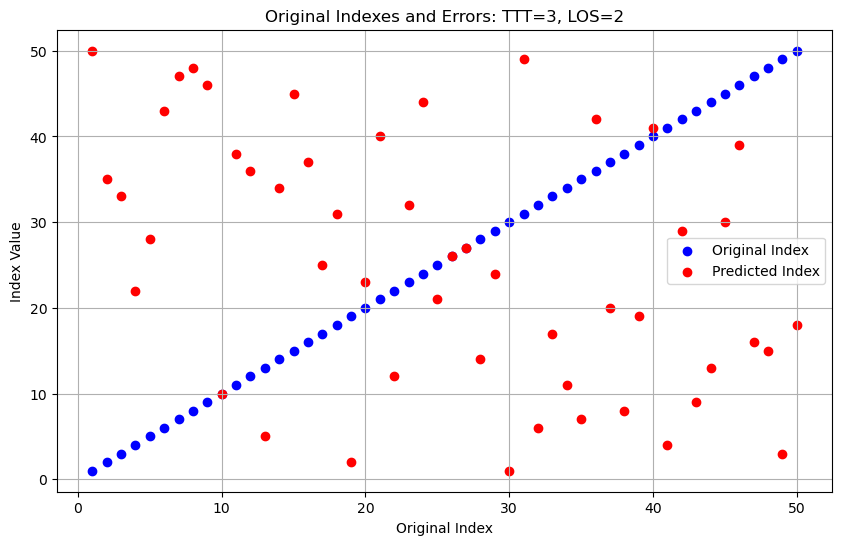

Accuracy rate for group TTT=3, LOS=2: 0.51


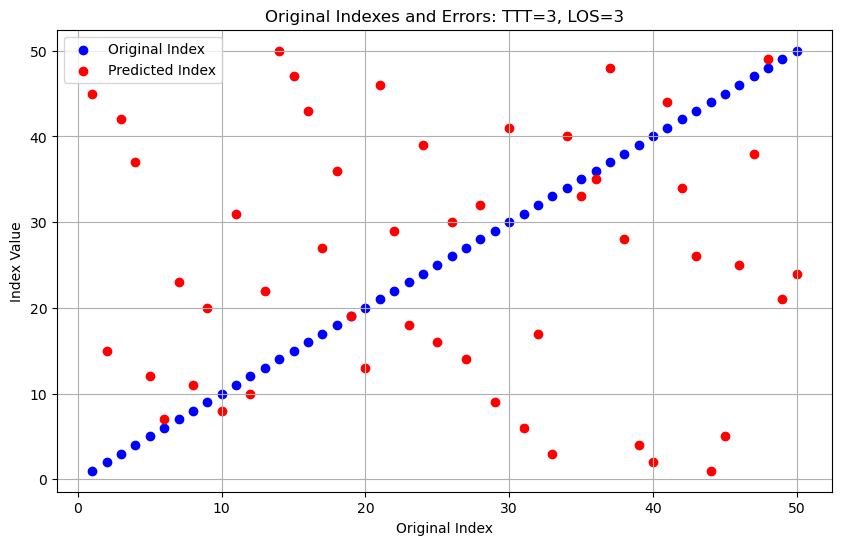

Accuracy rate for group TTT=3, LOS=3: 0.45


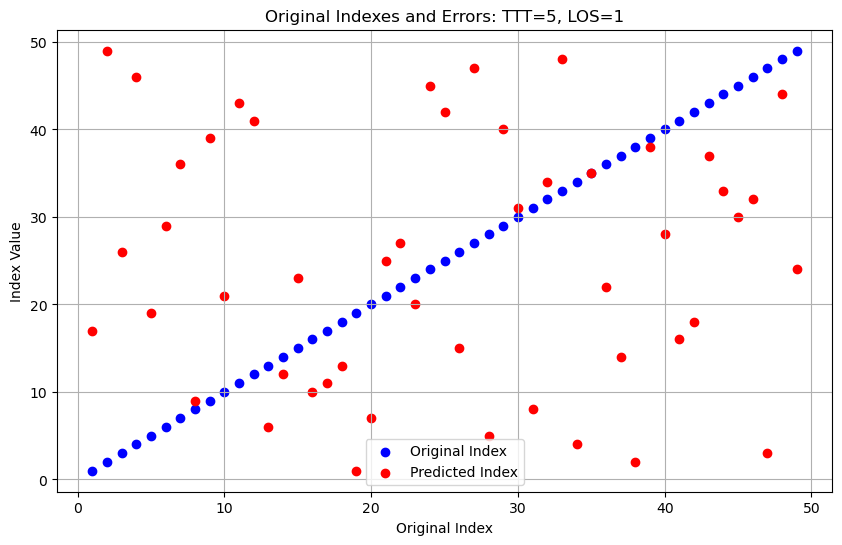

Accuracy rate for group TTT=5, LOS=1: 0.50


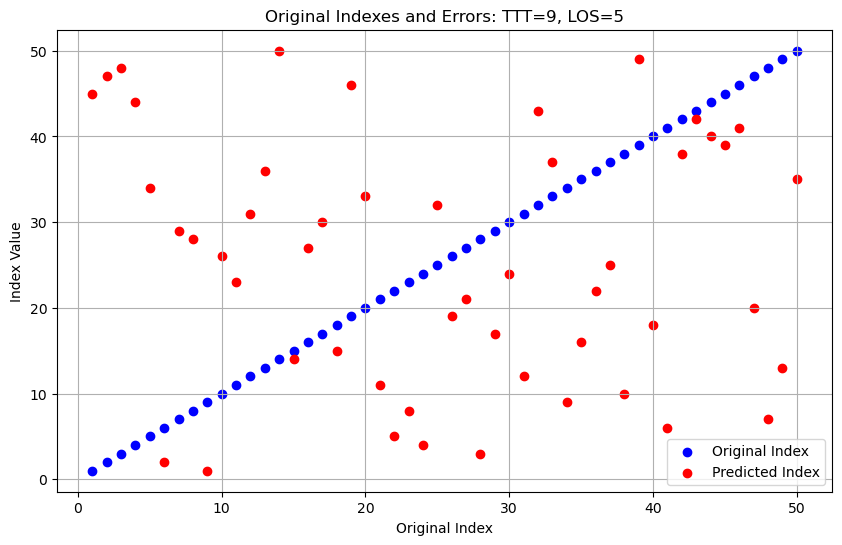

Accuracy rate for group TTT=9, LOS=5: 0.51


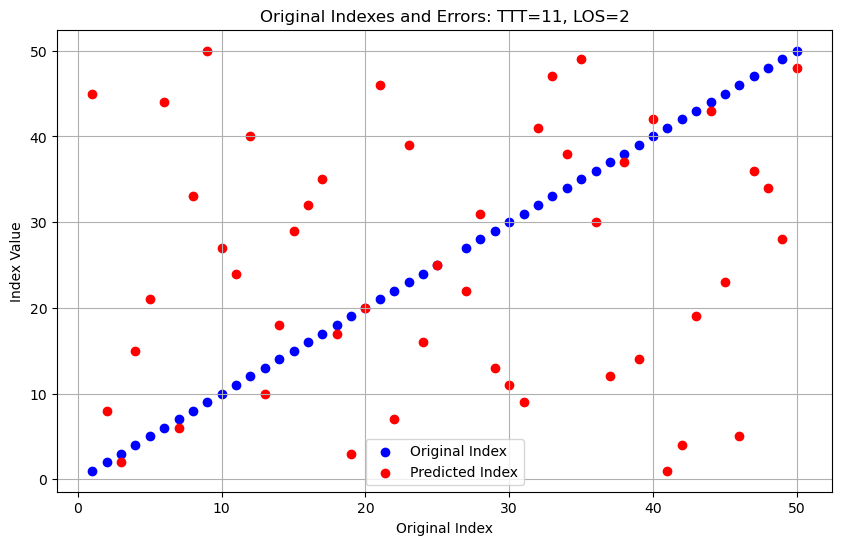

Accuracy rate for group TTT=11, LOS=2: 0.52


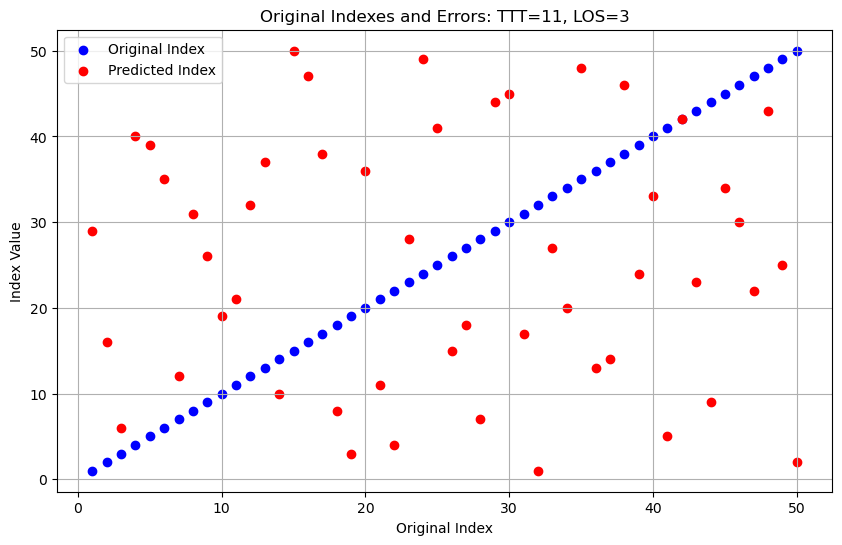

Accuracy rate for group TTT=11, LOS=3: 0.41


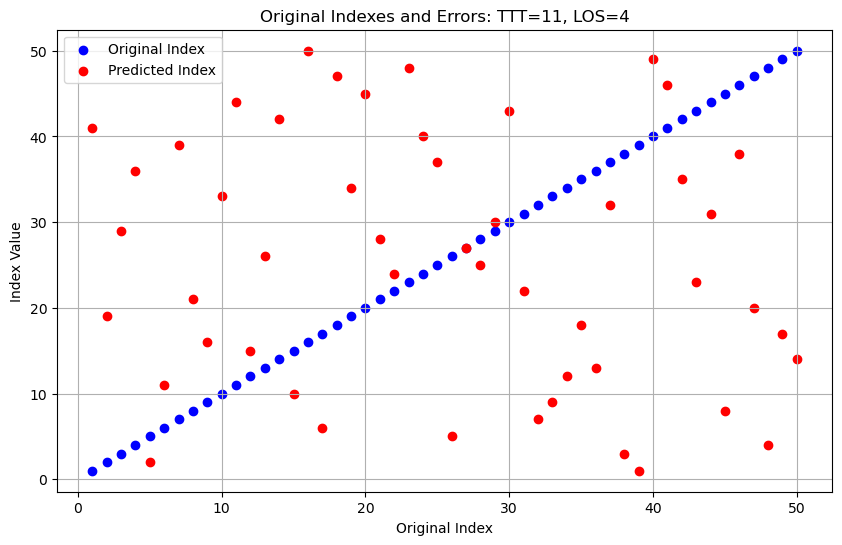

Accuracy rate for group TTT=11, LOS=4: 0.47


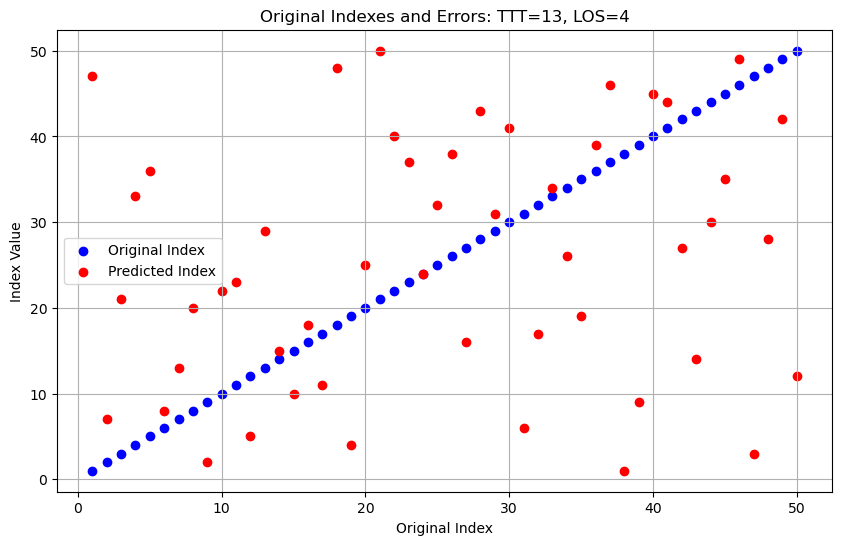

Accuracy rate for group TTT=13, LOS=4: 0.55


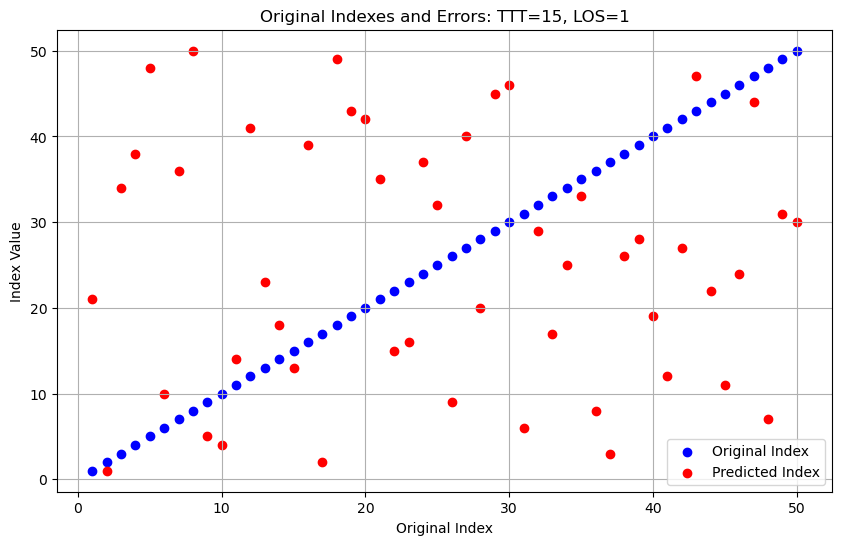

Accuracy rate for group TTT=15, LOS=1: 0.49


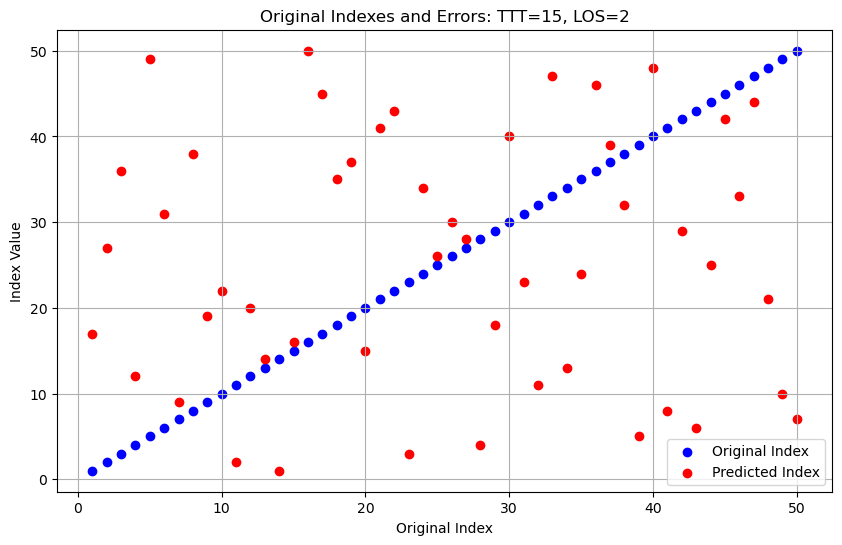

Accuracy rate for group TTT=15, LOS=2: 0.47


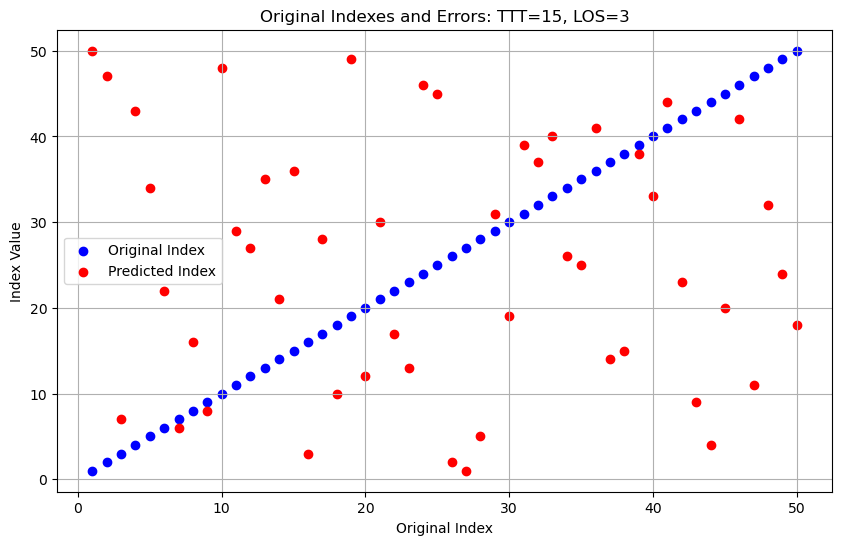

Accuracy rate for group TTT=15, LOS=3: 0.41


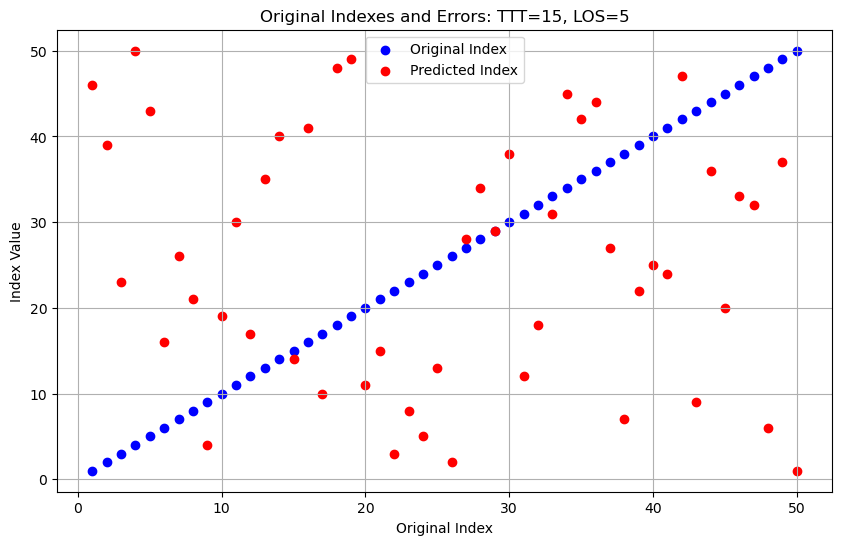

Accuracy rate for group TTT=15, LOS=5: 0.51


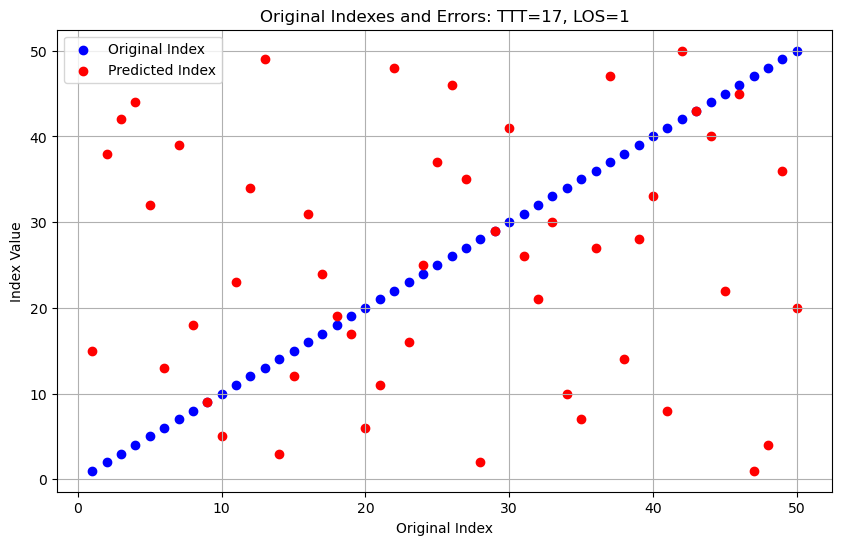

Accuracy rate for group TTT=17, LOS=1: 0.51


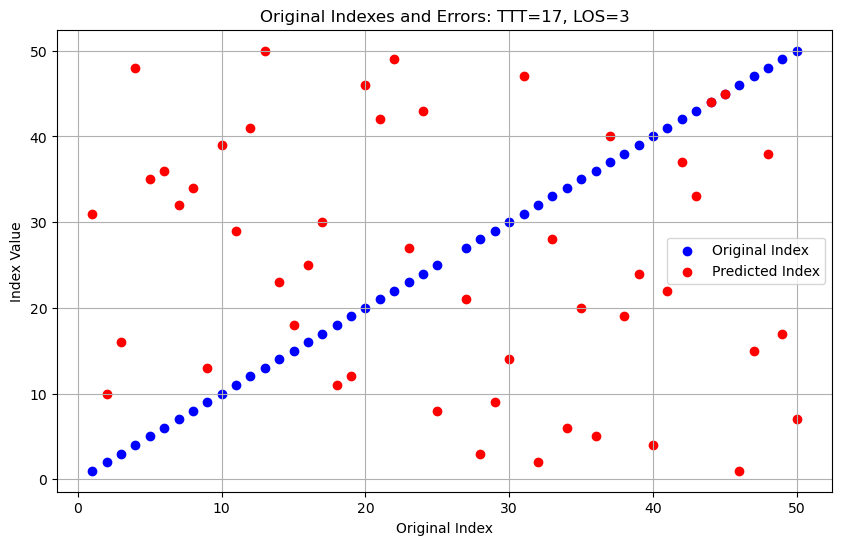

Accuracy rate for group TTT=17, LOS=3: 0.56


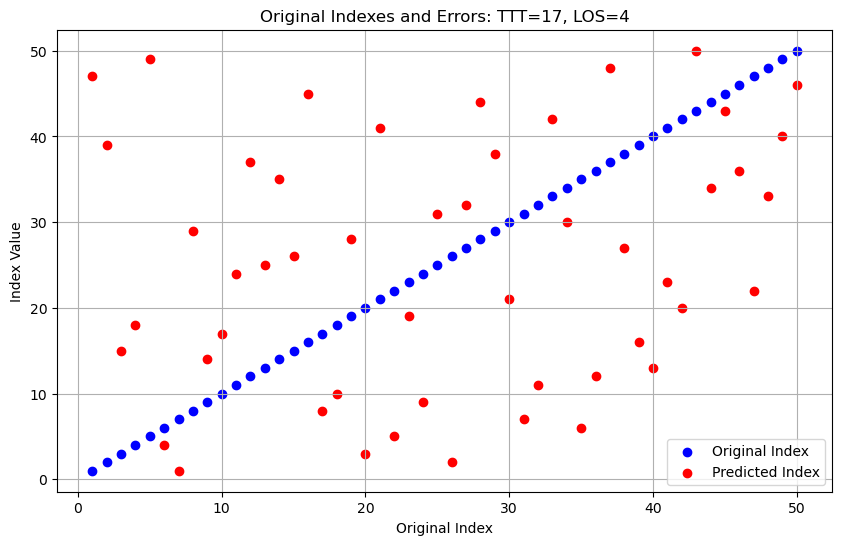

Accuracy rate for group TTT=17, LOS=4: 0.51


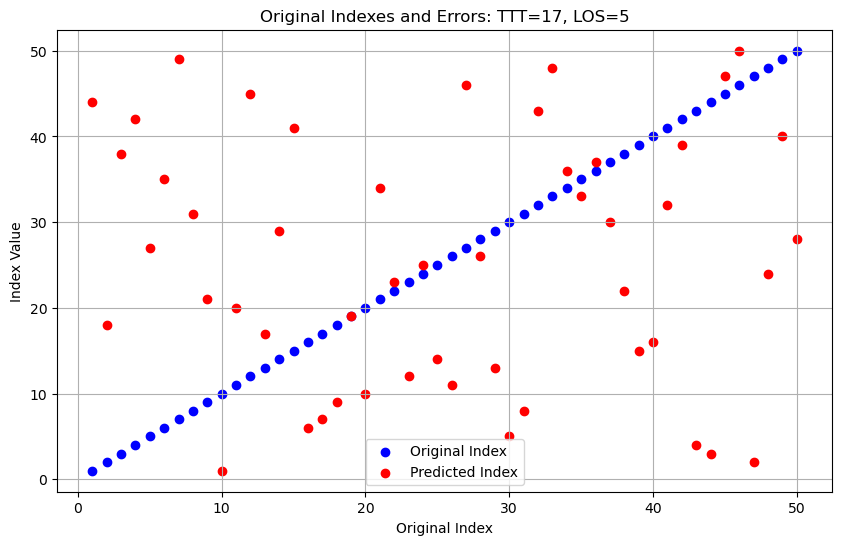

Accuracy rate for group TTT=17, LOS=5: 0.51


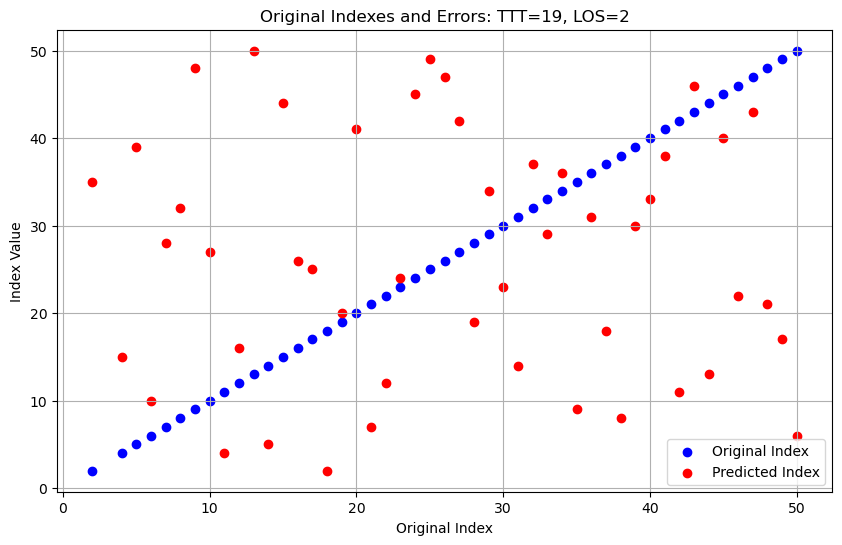

Accuracy rate for group TTT=19, LOS=2: 0.49


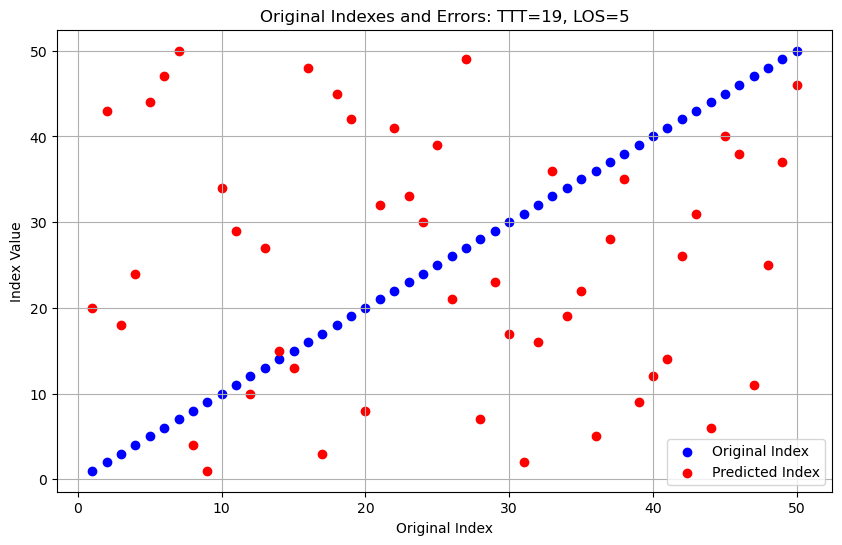

Accuracy rate for group TTT=19, LOS=5: 0.55
Average Error: 21942.6
Standard Deviation of Errors: 2864.2013267226866


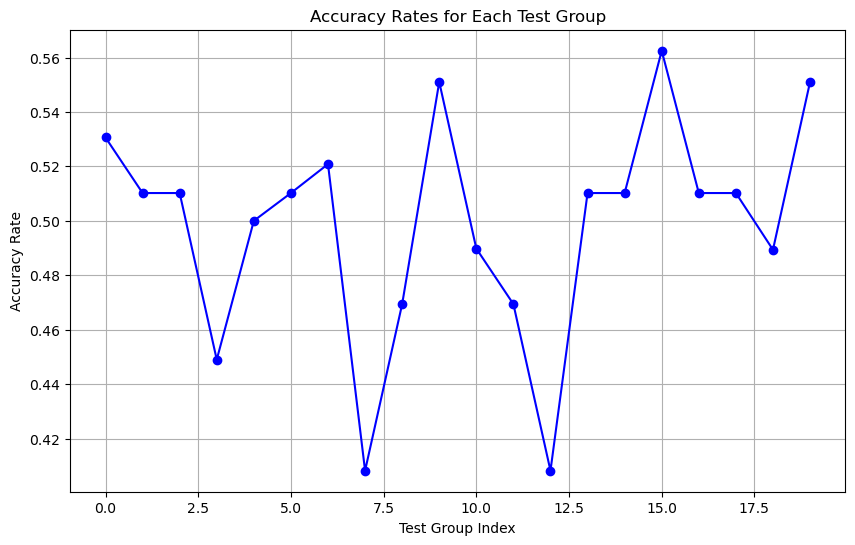

In [62]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Split data into training and test sets based on TTT values
even_ttt = df[df['TTT'] % 2 == 0]
odd_ttt = df[df['TTT'] % 2 != 0]

print(f"sum of EVEN TTT unique groups: {even_ttt.groupby(['TTT', 'LOS']).ngroups}")
print(f"sum of ODD TTT unique groups: {odd_ttt.groupby(['TTT', 'LOS']).ngroups}")

# Select n unique groups for training
train_groups = even_ttt.groupby(['TTT', 'LOS']).size().reset_index().sample(n=50)
train_data = pd.merge(even_ttt, train_groups, on=['TTT', 'LOS'])

# Select n unique groups for testing
test_groups = odd_ttt.groupby(['TTT', 'LOS']).size().reset_index().sample(n=20)
test_data = pd.merge(odd_ttt, test_groups, on=['TTT', 'LOS'])

# Define features and target for the model
features = ['price', 'km_from_center', 'star_rating', 'reviews', 'score', 'location_rating']
train_X = train_data[features]
train_y = (train_data['index'].diff().shift(-1) < 0).astype(int)

# Train the Decision Tree Classifier
clf = DecisionTreeClassifier()
clf.fit(train_X, train_y)

# Function to compare two hotels using the trained model
def compare_hotels(hotel1, hotel2):
    features = ['price', 'km_from_center', 'star_rating', 'reviews', 'score', 'location_rating']
    pair = pd.DataFrame([hotel1[features], hotel2[features]])
    prediction = clf.predict(pair)
    # If prediction[0] is 1, it returns 1, indicating that the first hotel should appear after the second hotel.
    # If prediction[0] is 0, it returns -1, indicating that the first hotel should appear before the second hotel.
    return 1 if prediction[0] else -1

# Bubble Sort using the model
def bubble_sort_hotels(hotels):
    n = len(hotels)
    for i in range(n):
        for j in range(0, n-i-1):
            if compare_hotels(hotels.iloc[j], hotels.iloc[j+1]) == -1:
                hotels.iloc[j], hotels.iloc[j+1] = hotels.iloc[j+1], hotels.iloc[j]
    return hotels

# Calculate the sum of squared index differences
errors = []
accuracy_rates = []

for name, group in test_data.groupby(['TTT', 'LOS']):
    original_indices = group['index'].values
    shuffled_group = group.sample(frac=1).reset_index(drop=True)
    sorted_group = bubble_sort_hotels(shuffled_group)
    sorted_indices = sorted_group['index'].values
    error = np.sum((sorted_indices - original_indices)**2)
    errors.append(error)

    # Calculate accuracy
    correct_predictions = sum((sorted_indices[i] < sorted_indices[i+1]) == (original_indices[i] < original_indices[i+1])
                              for i in range(len(sorted_indices) - 1))
    accuracy_rate = correct_predictions / (len(sorted_indices) - 1)
    accuracy_rates.append(accuracy_rate)

    # Plot the original indexes as blue points and the errors as red points for each original index
    plt.figure(figsize=(10, 6))
    plt.scatter(original_indices, original_indices, color='blue', label='Original Index')
    plt.scatter(original_indices, sorted_indices, color='red', label='Predicted Index')
    plt.title(f'Original Indexes and Errors: TTT={group["TTT"].values[0]}, LOS={group["LOS"].values[0]}')
    plt.xlabel('Original Index')
    plt.ylabel('Index Value')
    plt.legend()
    plt.grid(True)
    plt.show()

    print(f"Accuracy rate for group TTT={group['TTT'].values[0]}, LOS={group['LOS'].values[0]}: {accuracy_rate:.2f}")

# Calculate the average and standard deviation of errors
avg_error = np.mean(errors)
std_error = np.std(errors)

# Display the results
print(f'Average Error: {avg_error}')
print(f'Standard Deviation of Errors: {std_error}')

# Plot the overall accuracy rates
plt.figure(figsize=(10, 6))
plt.plot(range(len(accuracy_rates)), accuracy_rates, marker='o', linestyle='-', color='blue')
plt.title('Accuracy Rates for Each Test Group')
plt.xlabel('Test Group Index')
plt.ylabel('Accuracy Rate')
plt.grid(True)
plt.show()


C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


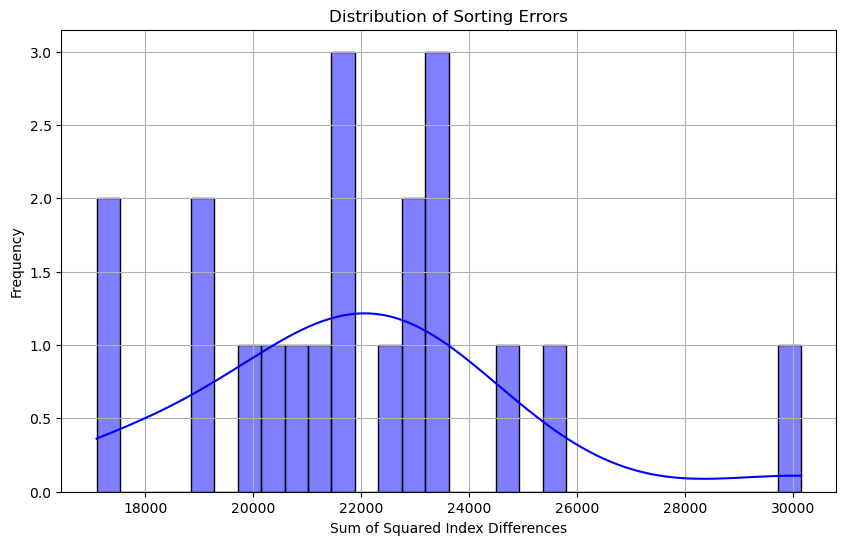

In [63]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'errors' list is already calculated as before

# Plot the errors using a histogram
plt.figure(figsize=(10, 6))
sns.histplot(errors, kde=True, bins=30, color='blue')
plt.title('Distribution of Sorting Errors')
plt.xlabel('Sum of Squared Index Differences')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Repeat the process but with other model: Random Forest

sum of EVEN TTT unique groups: 50
sum of ODD TTT unique groups: 50


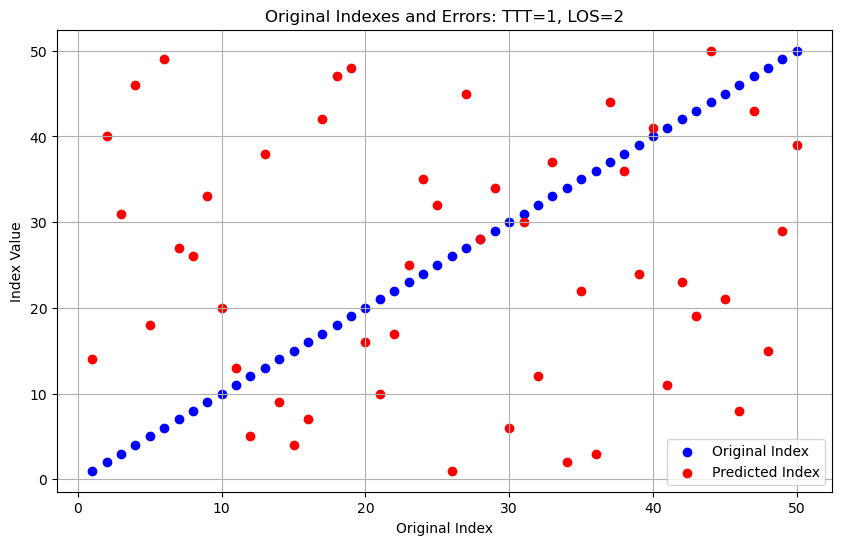

Accuracy rate for group TTT=1, LOS=2: 0.49


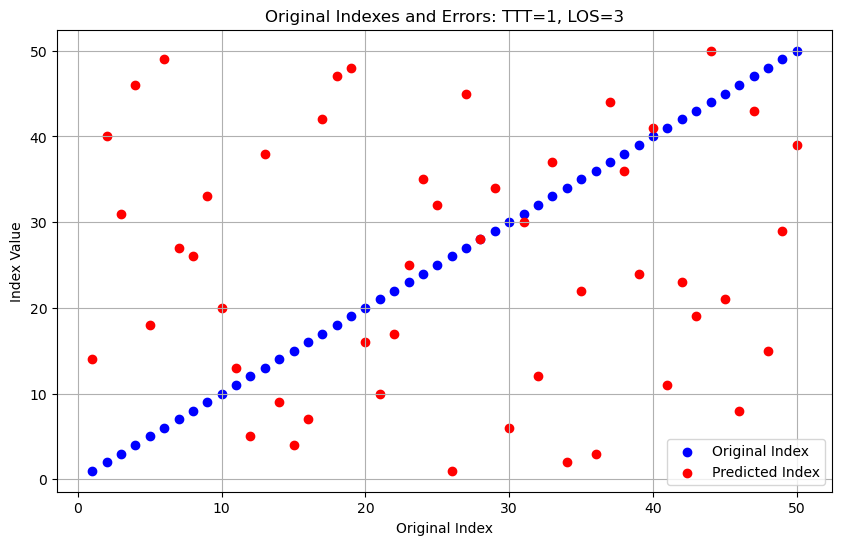

Accuracy rate for group TTT=1, LOS=3: 0.49


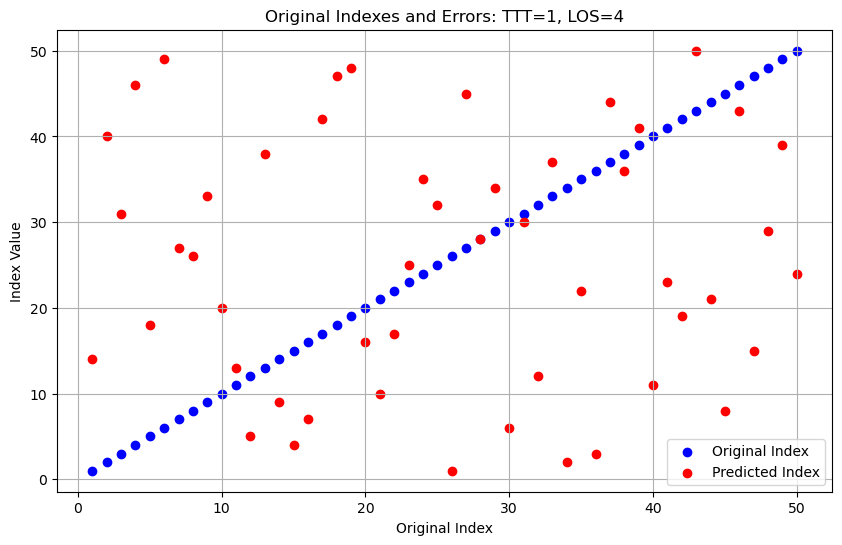

Accuracy rate for group TTT=1, LOS=4: 0.49


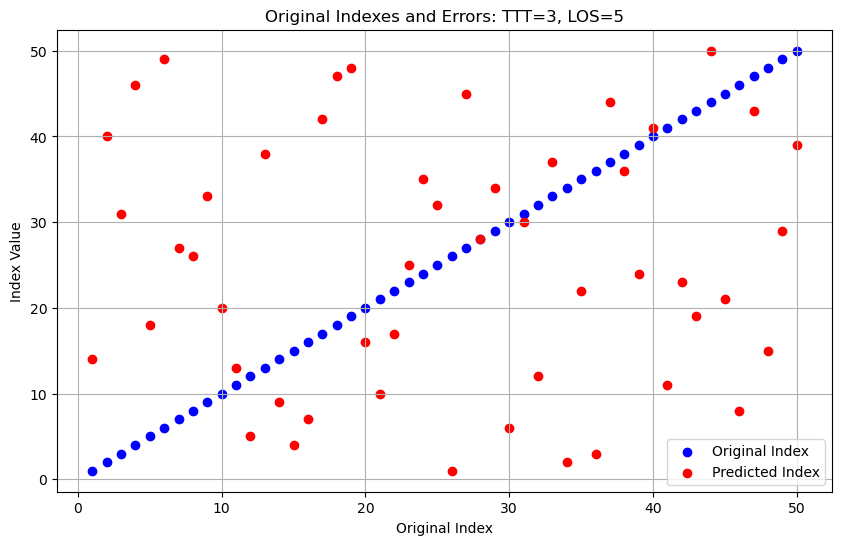

Accuracy rate for group TTT=3, LOS=5: 0.49


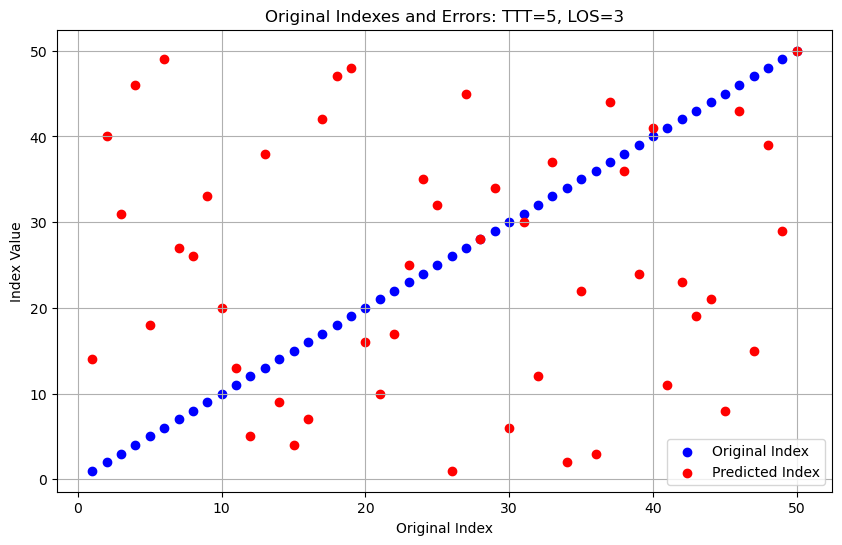

Accuracy rate for group TTT=5, LOS=3: 0.49


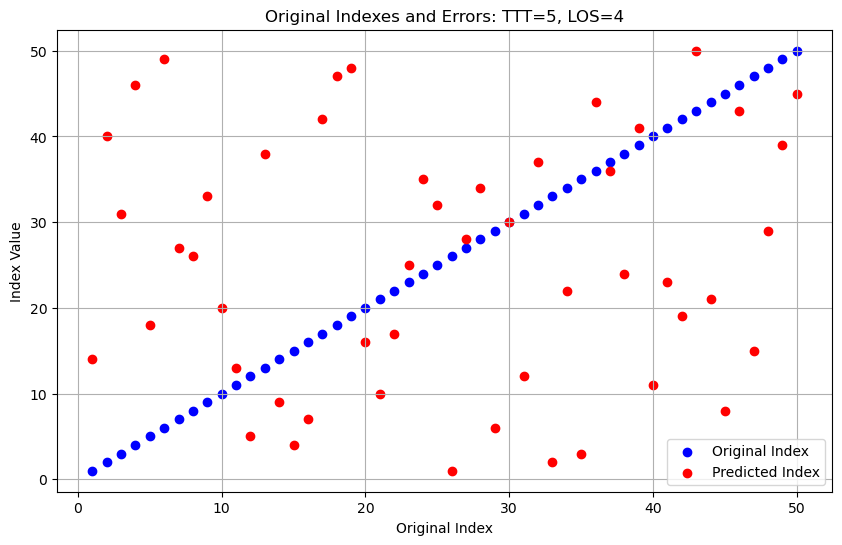

Accuracy rate for group TTT=5, LOS=4: 0.51


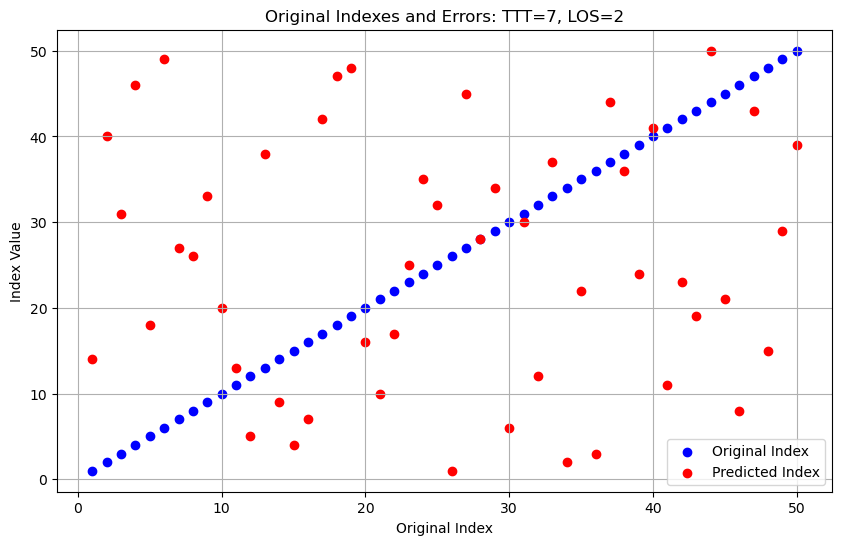

Accuracy rate for group TTT=7, LOS=2: 0.49


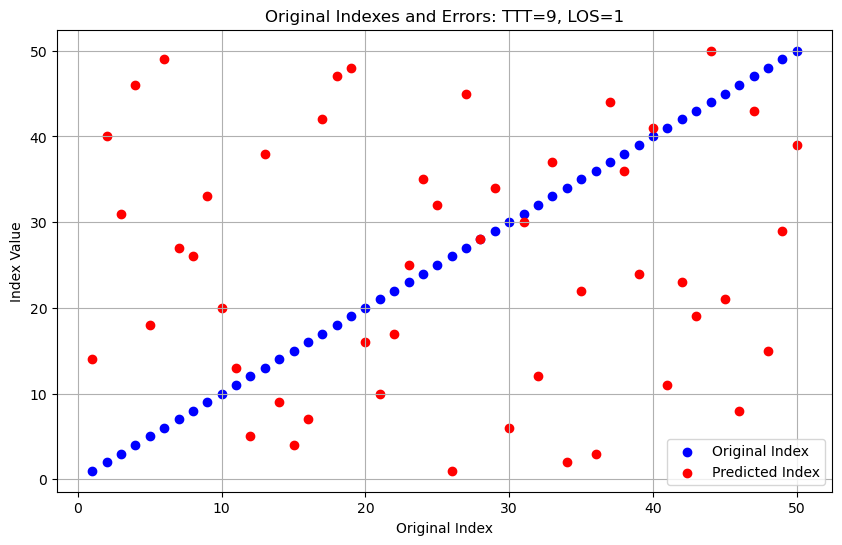

Accuracy rate for group TTT=9, LOS=1: 0.49


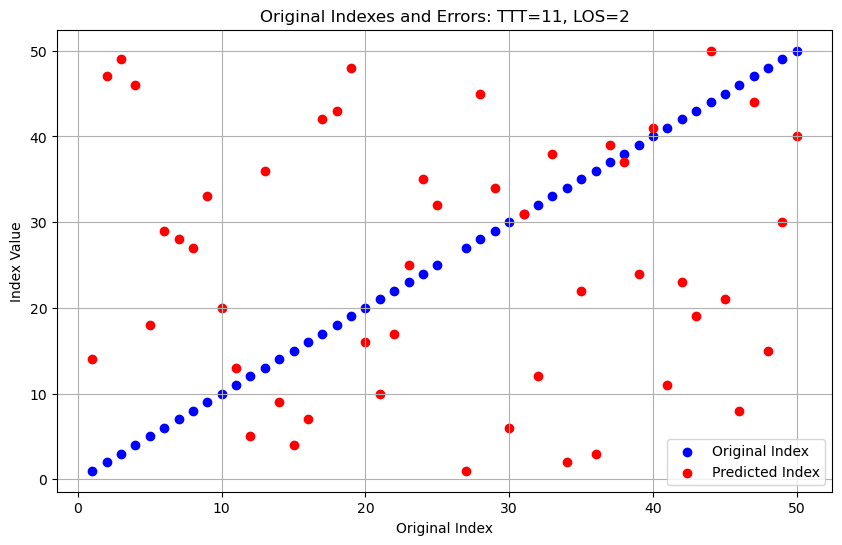

Accuracy rate for group TTT=11, LOS=2: 0.48


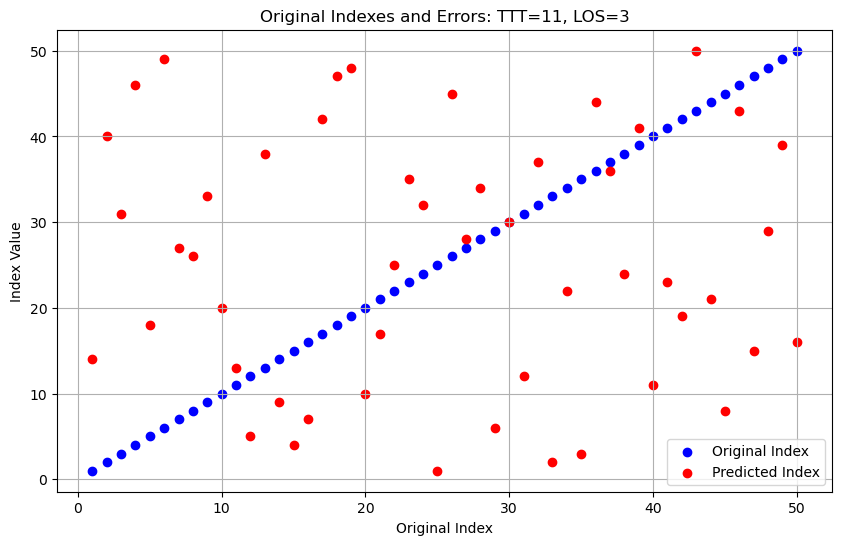

Accuracy rate for group TTT=11, LOS=3: 0.49


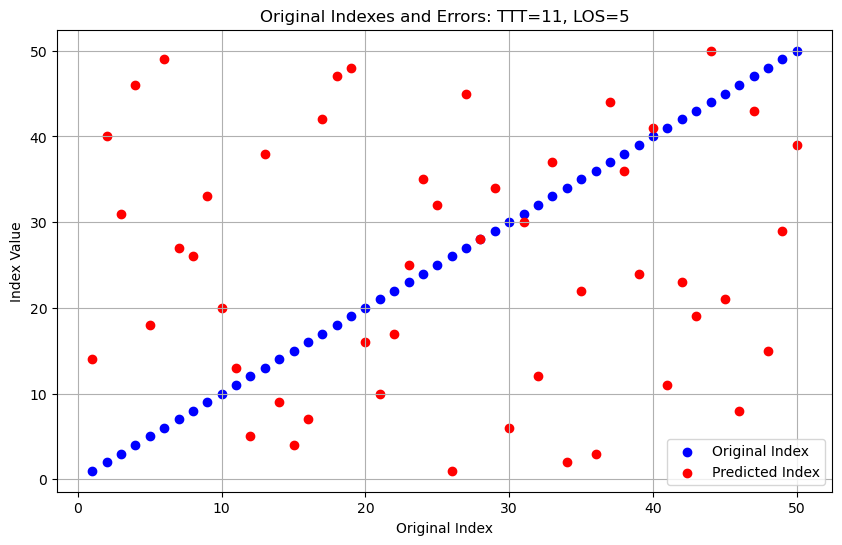

Accuracy rate for group TTT=11, LOS=5: 0.49


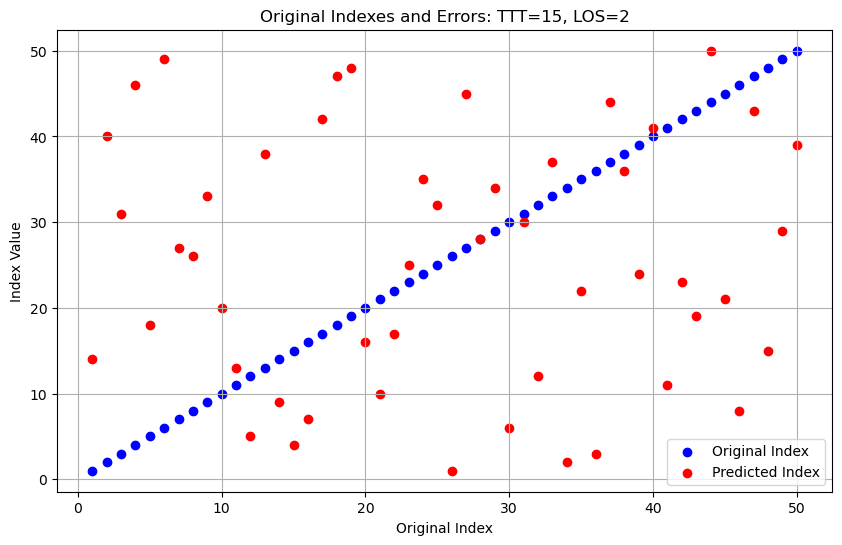

Accuracy rate for group TTT=15, LOS=2: 0.49


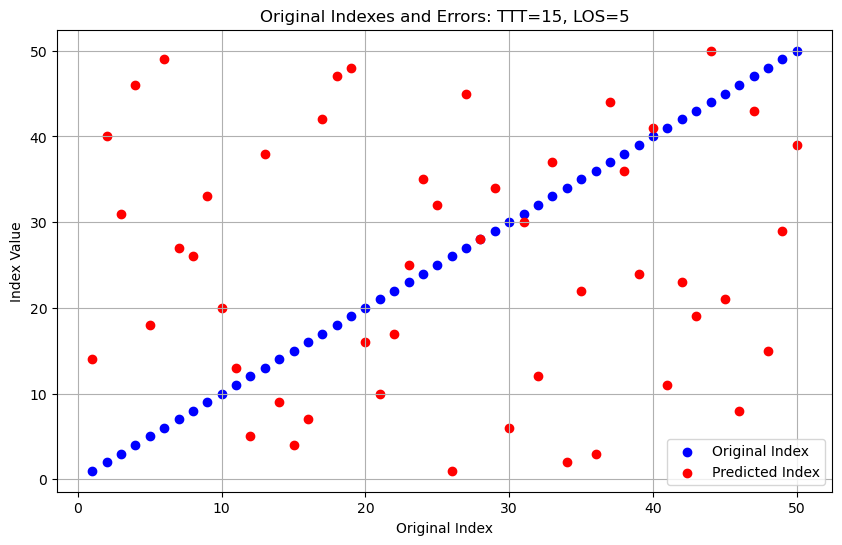

Accuracy rate for group TTT=15, LOS=5: 0.49


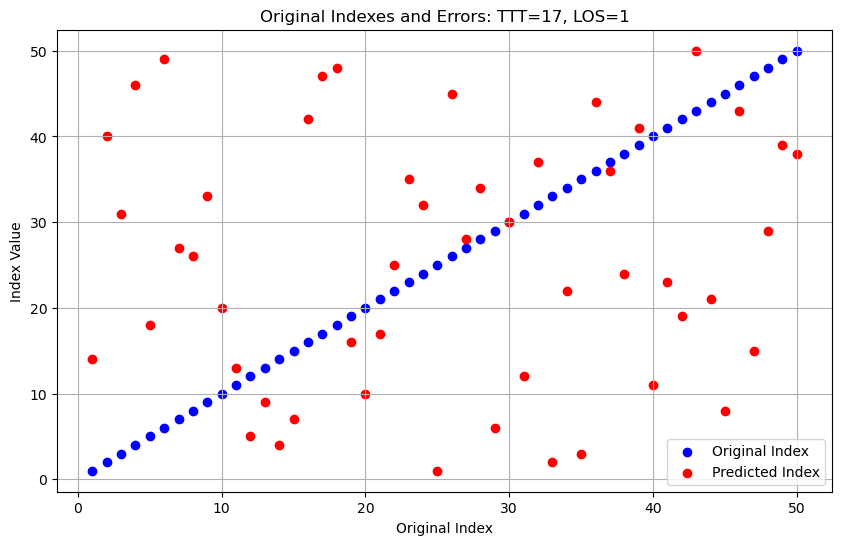

Accuracy rate for group TTT=17, LOS=1: 0.49


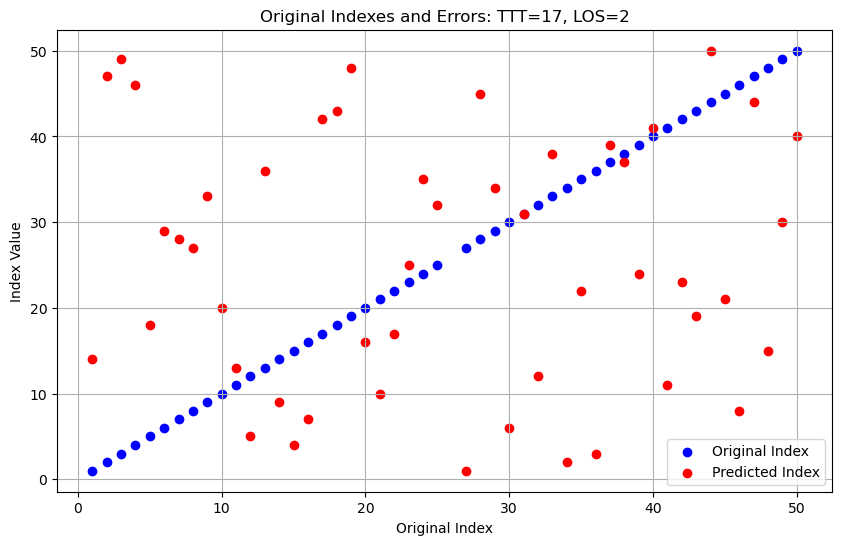

Accuracy rate for group TTT=17, LOS=2: 0.48


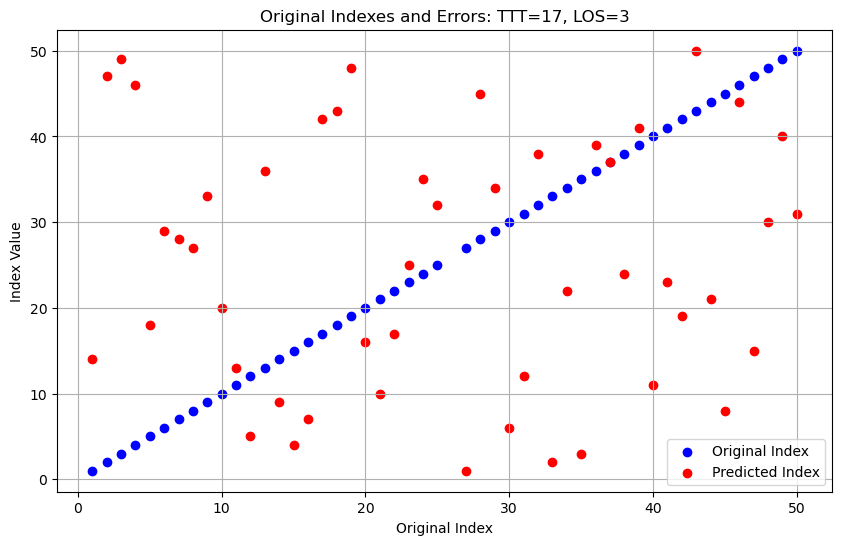

Accuracy rate for group TTT=17, LOS=3: 0.48


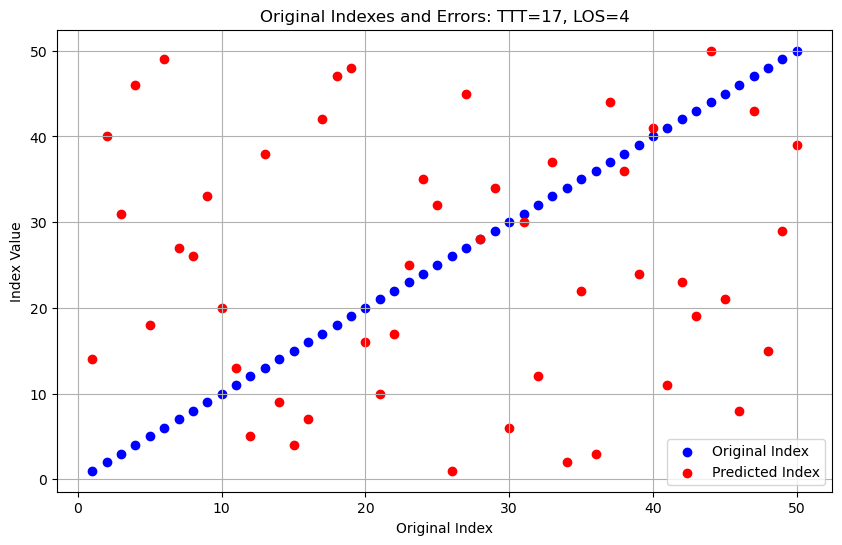

Accuracy rate for group TTT=17, LOS=4: 0.49


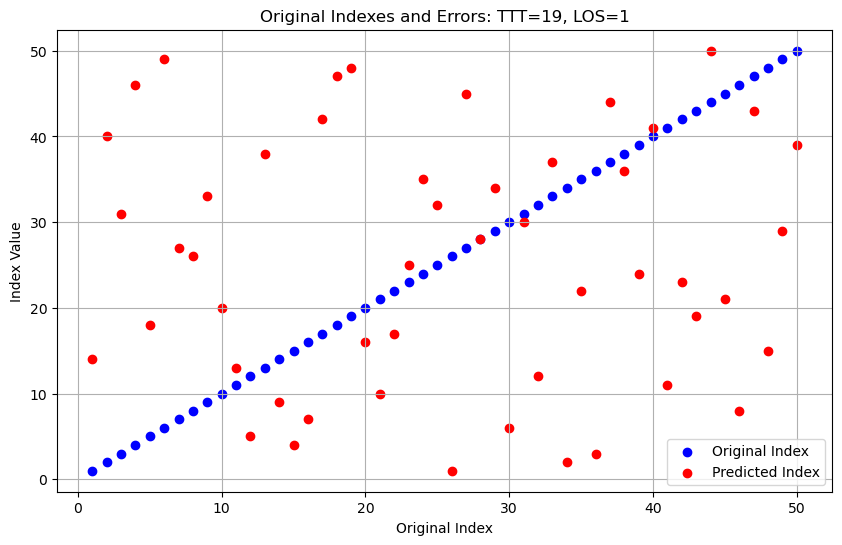

Accuracy rate for group TTT=19, LOS=1: 0.49


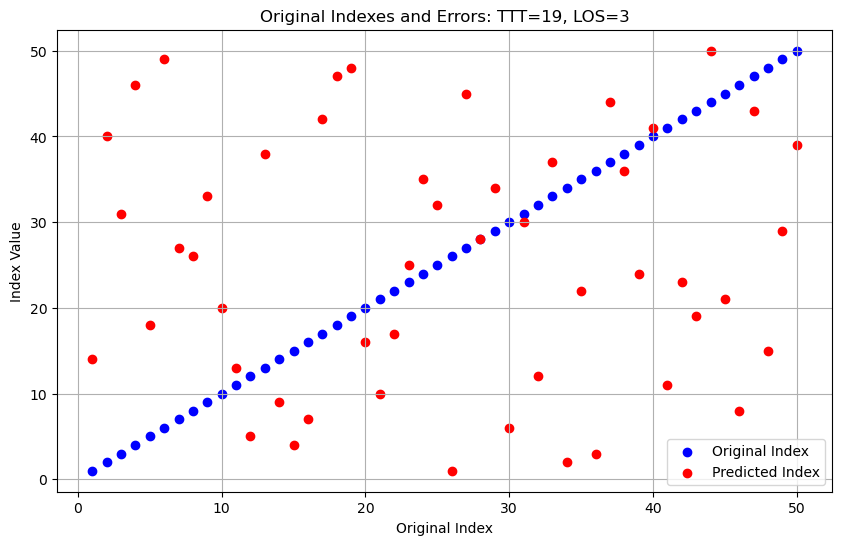

Accuracy rate for group TTT=19, LOS=3: 0.49


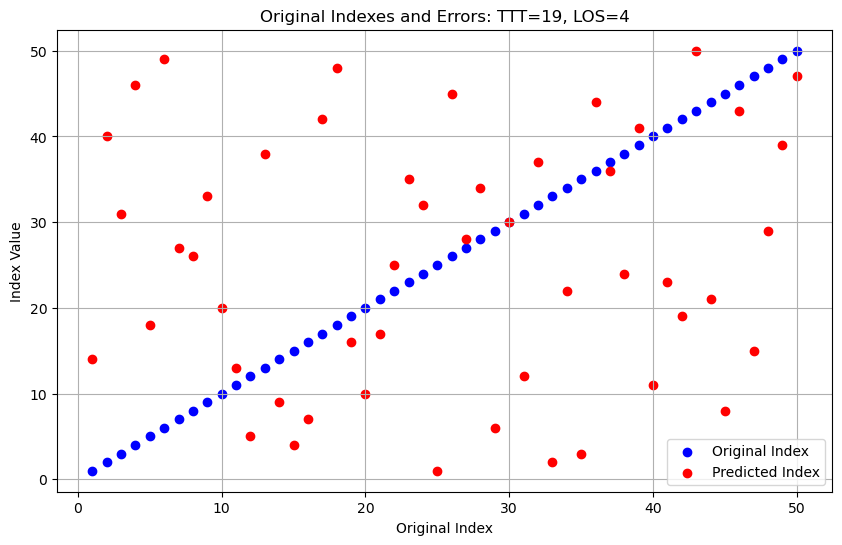

Accuracy rate for group TTT=19, LOS=4: 0.49


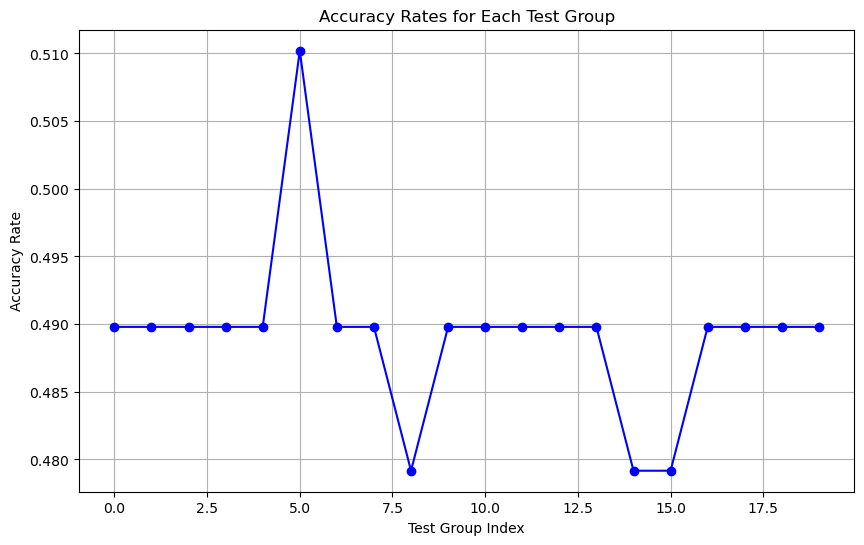

In [65]:
import pandas as pd
import numpy as np
import random
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Define feature columns
feature_columns = ['price', 'km_from_center', 'star_rating', 'reviews', 'score', 'location_rating']

# Assuming df is your DataFrame
# Split data into training and test sets based on TTT values
even_ttt = df[df['TTT'] % 2 == 0]
odd_ttt = df[df['TTT'] % 2 != 0]

print(f"sum of EVEN TTT unique groups: {even_ttt.groupby(['TTT', 'LOS']).ngroups}")
print(f"sum of ODD TTT unique groups: {odd_ttt.groupby(['TTT', 'LOS']).ngroups}")

# Select n unique groups for training
train_groups = even_ttt.groupby(['TTT', 'LOS']).size().reset_index().sample(n=50)
train_data = pd.merge(even_ttt, train_groups, on=['TTT', 'LOS'])

# Select n unique groups for testing
test_groups = odd_ttt.groupby(['TTT', 'LOS']).size().reset_index().sample(n=20)
test_data = pd.merge(odd_ttt, test_groups, on=['TTT', 'LOS'])

# Prepare training data for the classifier
train_X = train_data[feature_columns]
train_y = (train_data['index'].diff().shift(-1) < 0).astype(int)

# Prepare the classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(train_X, train_y)

# Function to predict the order of two hotels
def predict_order(hotel1, hotel2):
    pair = pd.DataFrame([hotel1, hotel2])
    pair = pair[feature_columns]
    prediction = clf.predict(pair)
    return 1 if prediction[0] else -1

# Function to perform Bubble Sort based on the prediction model
def bubble_sort_hotels(hotels):
    sorted_hotels = hotels.copy()
    n = len(sorted_hotels)
    for i in range(n):
        for j in range(0, n-i-1):
            hotel1 = sorted_hotels.iloc[j]
            hotel2 = sorted_hotels.iloc[j+1]
            if predict_order(hotel1, hotel2) == 1:
                sorted_hotels.iloc[j], sorted_hotels.iloc[j+1] = sorted_hotels.iloc[j+1], sorted_hotels.iloc[j]
    return sorted_hotels

# Calculate the error for the test data
errors = []
accuracy_rates = []

test_groups = test_data.groupby(['TTT', 'LOS'])
for name, group in test_groups:
    original_indices = group['index'].values
    shuffled_group = group.sample(frac=1, random_state=42).reset_index(drop=True)
    sorted_group = bubble_sort_hotels(shuffled_group)
    sorted_indices = sorted_group['index'].values

    error = np.sum((original_indices - sorted_indices) ** 2)
    errors.append(error)

    # Calculate accuracy
    correct_predictions = sum((sorted_indices[i] < sorted_indices[i+1]) == (original_indices[i] < original_indices[i+1])
                              for i in range(len(sorted_indices) - 1))
    accuracy_rate = correct_predictions / (len(sorted_indices) - 1)
    accuracy_rates.append(accuracy_rate)

    # Plot the original indexes as blue points and the errors as red points for each original index
    plt.figure(figsize=(10, 6))
    plt.scatter(original_indices, original_indices, color='blue', label='Original Index')
    plt.scatter(original_indices, sorted_indices, color='red', label='Predicted Index')
    plt.title(f'Original Indexes and Errors: TTT={group["TTT"].values[0]}, LOS={group["LOS"].values[0]}')
    plt.xlabel('Original Index')
    plt.ylabel('Index Value')
    plt.legend()
    plt.grid(True)
    plt.show()

    print(f"Accuracy rate for group TTT={group['TTT'].values[0]}, LOS={group['LOS'].values[0]}: {accuracy_rate:.2f}")

# Calculate the average and standard deviation of errors
avg_error = np.mean(errors)
std_error = np.std(errors)

# Plot the overall accuracy rates
plt.figure(figsize=(10, 6))
plt.plot(range(len(accuracy_rates)), accuracy_rates, marker='o', linestyle='-', color='blue')
plt.title('Accuracy Rates for Each Test Group')
plt.xlabel('Test Group Index')
plt.ylabel('Accuracy Rate')
plt.grid(True)
plt.show()

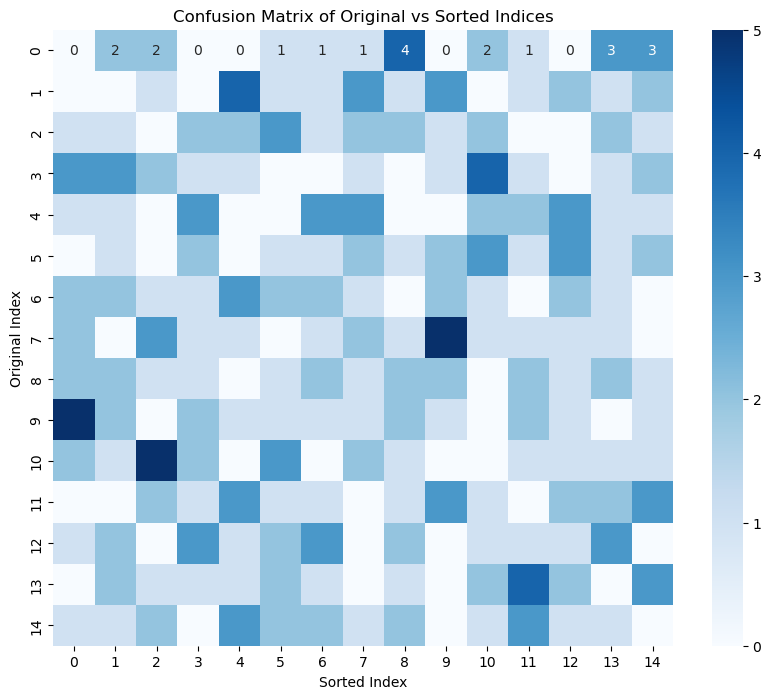

In [66]:
# Calculate the confusion matrix
conf_matrix = confusion_matrix(all_original_indices, all_sorted_indices)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix of Original vs Sorted Indices')
plt.xlabel('Sorted Index')
plt.ylabel('Original Index')
plt.show()

In [67]:
# Display the results
print(f'Average Error: {avg_error}')
print(f'Standard Deviation of Errors: {std_error}')

Average Error: 21054.7
Standard Deviation of Errors: 445.30181899471285


C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


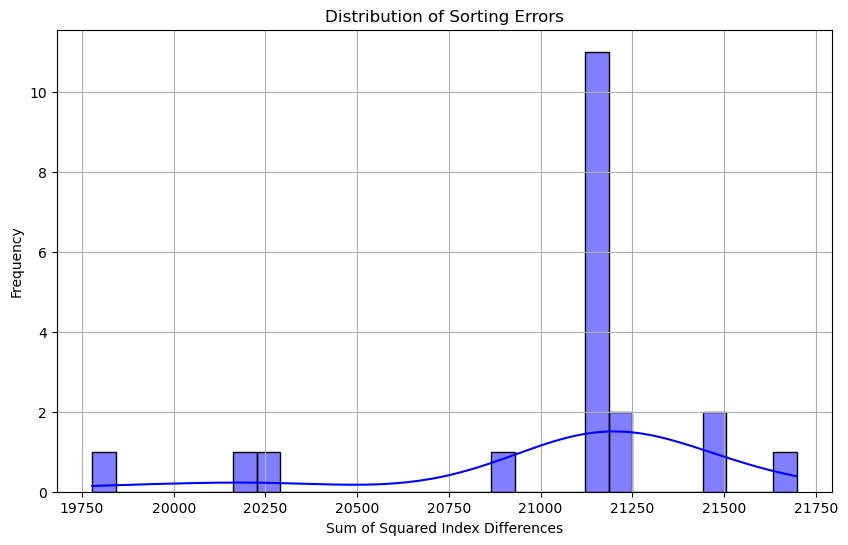

In [68]:
# Plot the errors using a histogram
plt.figure(figsize=(10, 6))
sns.histplot(errors, kde=True, bins=30, color='blue')
plt.title('Distribution of Sorting Errors')
plt.xlabel('Sum of Squared Index Differences')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

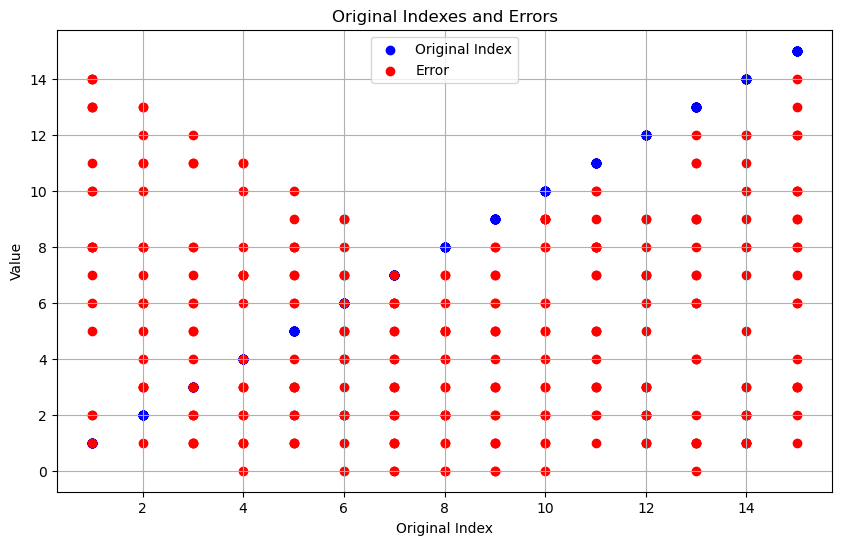

In [69]:
# Plot the original indexes as blue points and the errors as red points for each original index
plt.figure(figsize=(10, 6))
plt.scatter(all_original_indices, all_original_indices, color='blue', label='Original Index')
plt.scatter(all_original_indices, np.abs(np.array(all_original_indices) - np.array(all_sorted_indices)), color='red', label='Error')
plt.title('Original Indexes and Errors')
plt.xlabel('Original Index')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()

# Repeat the process but with other model: KNN

sum of EVEN TTT unique groups: 50
sum of ODD TTT unique groups: 50


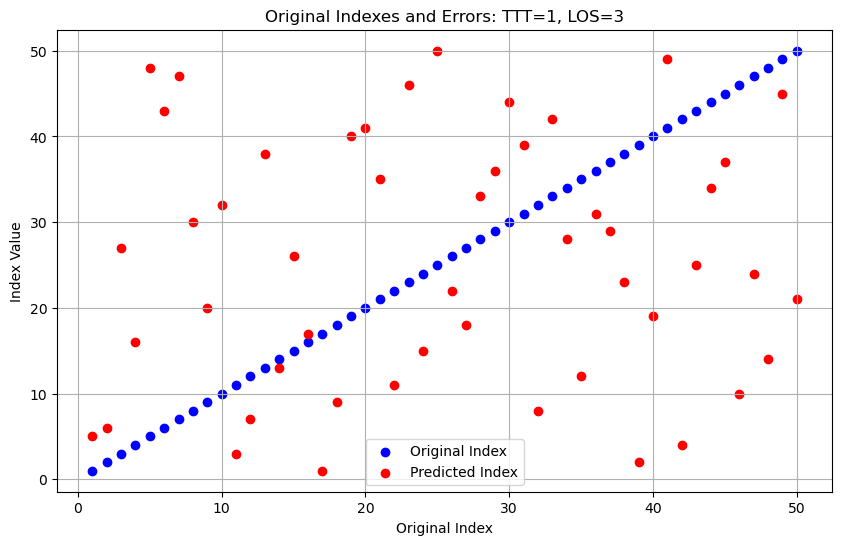

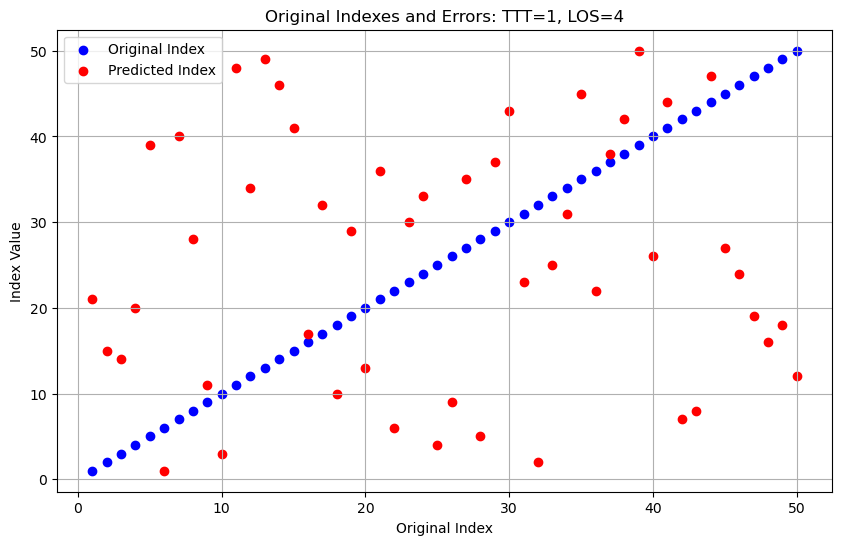

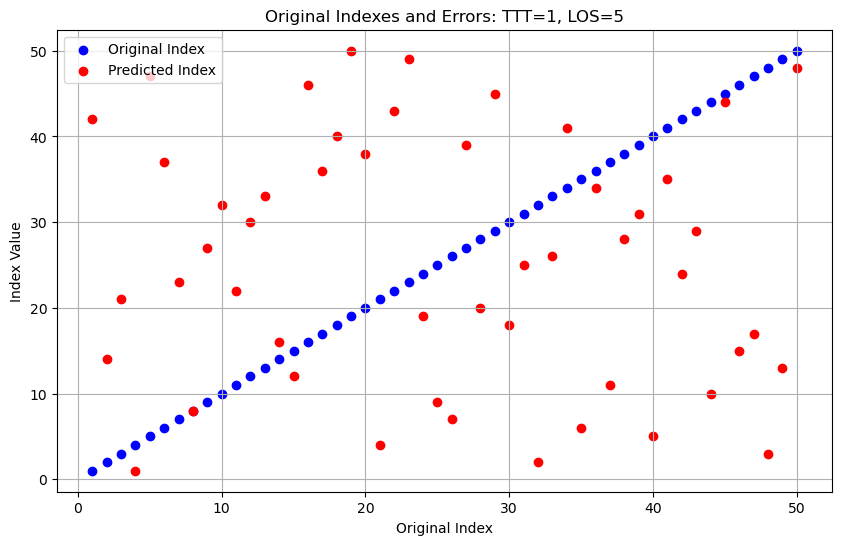

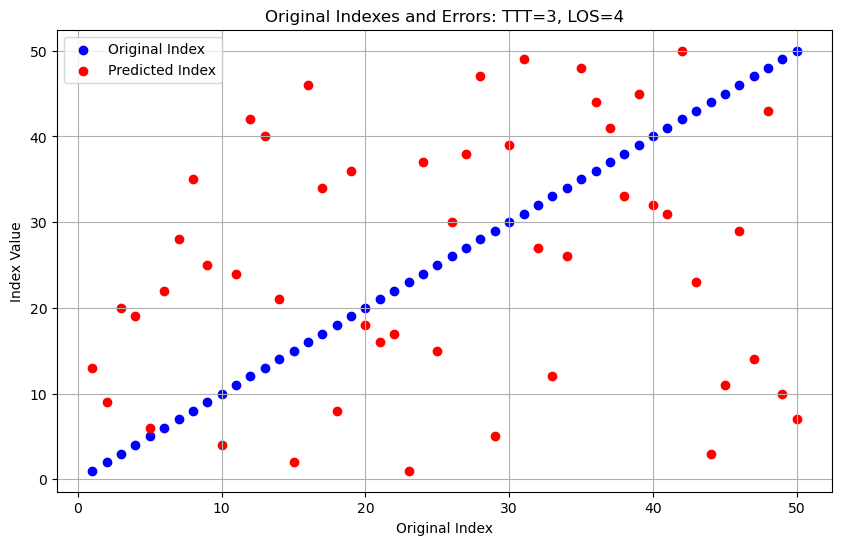

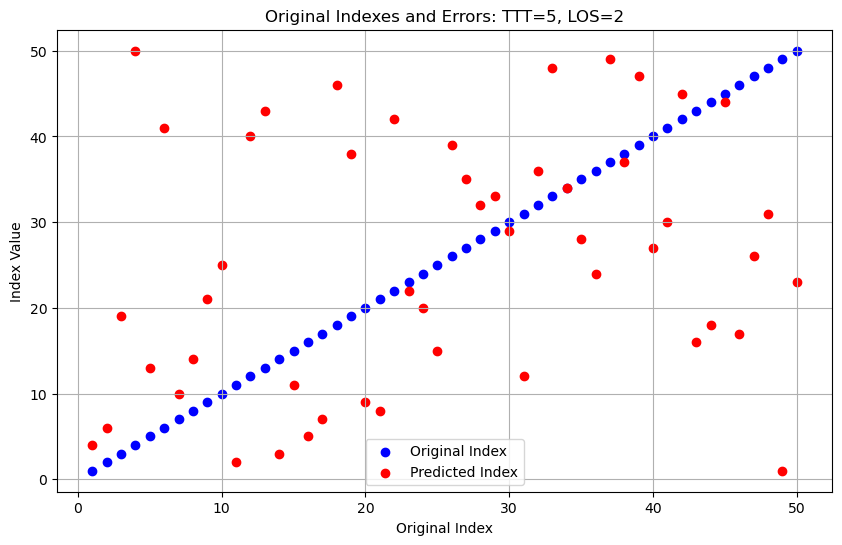

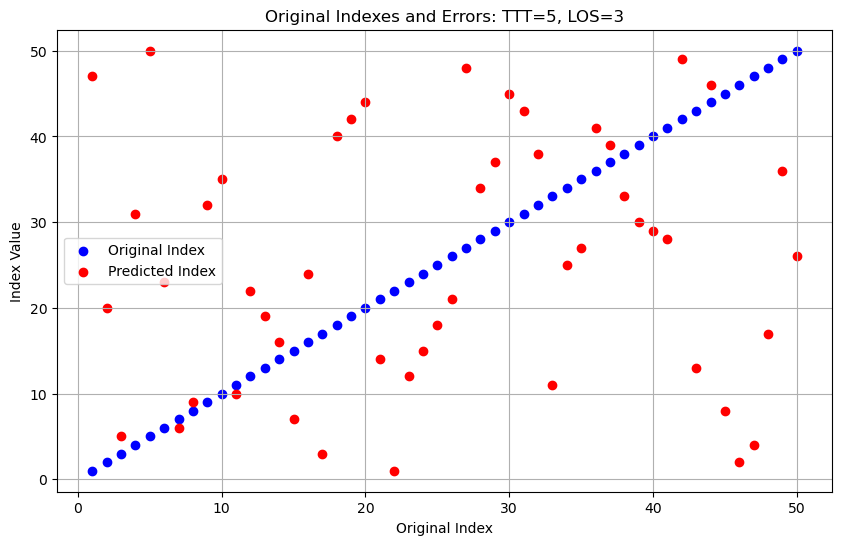

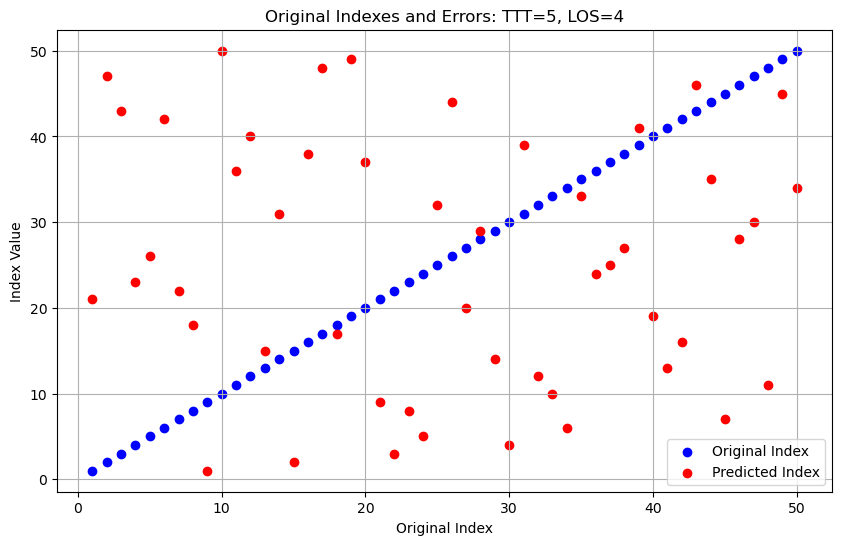

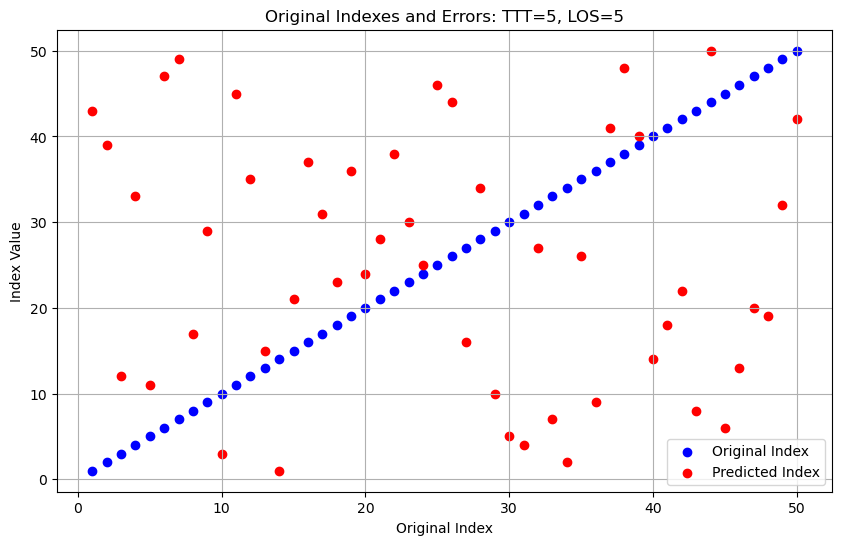

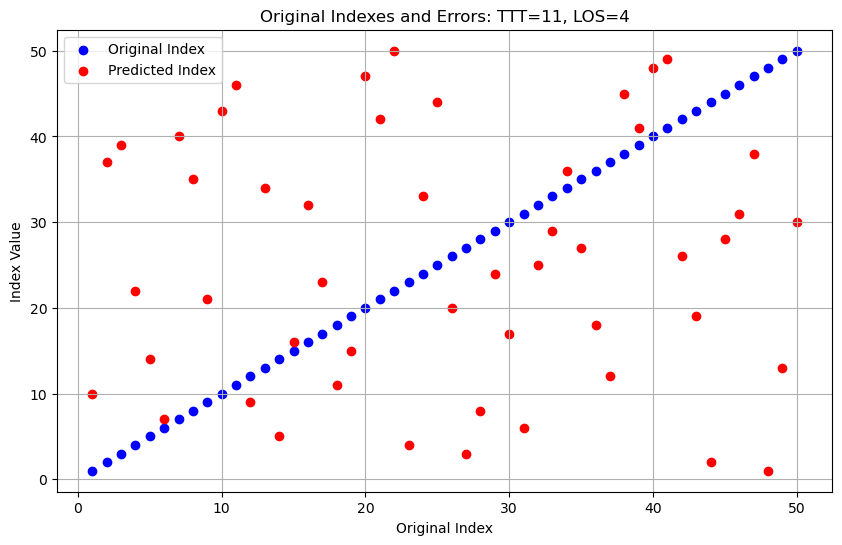

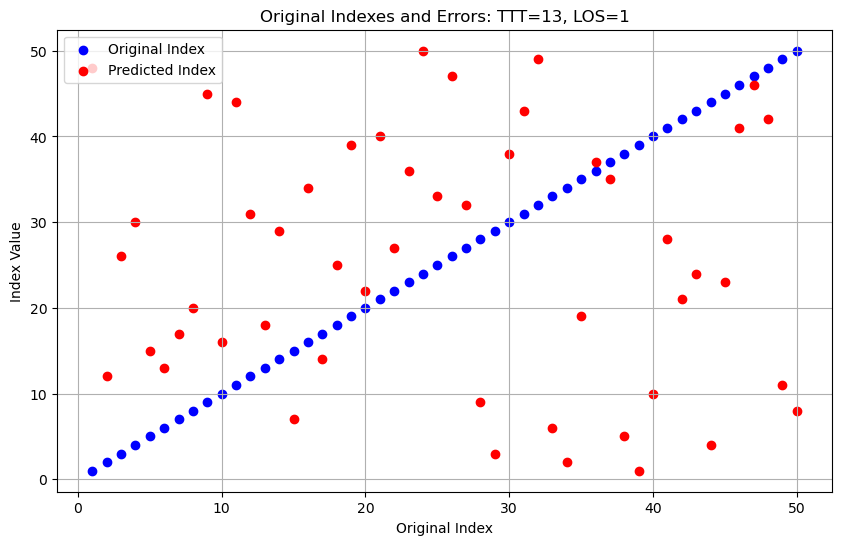

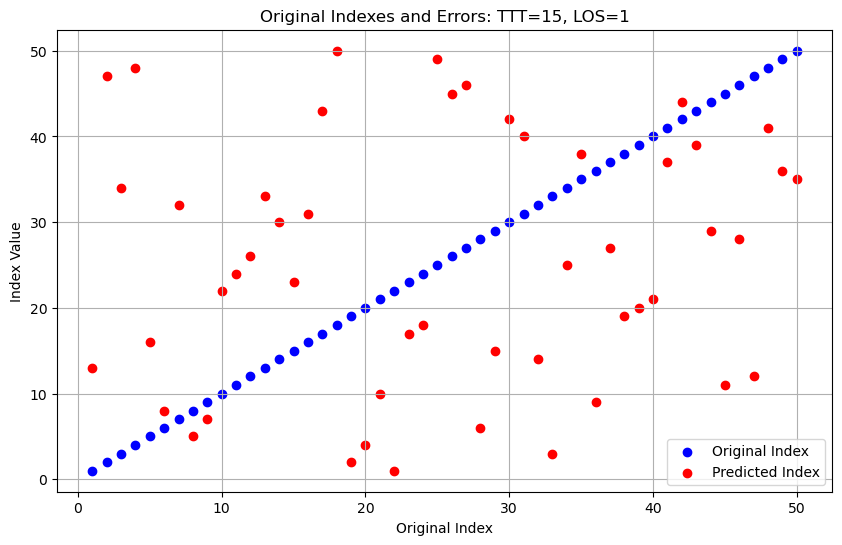

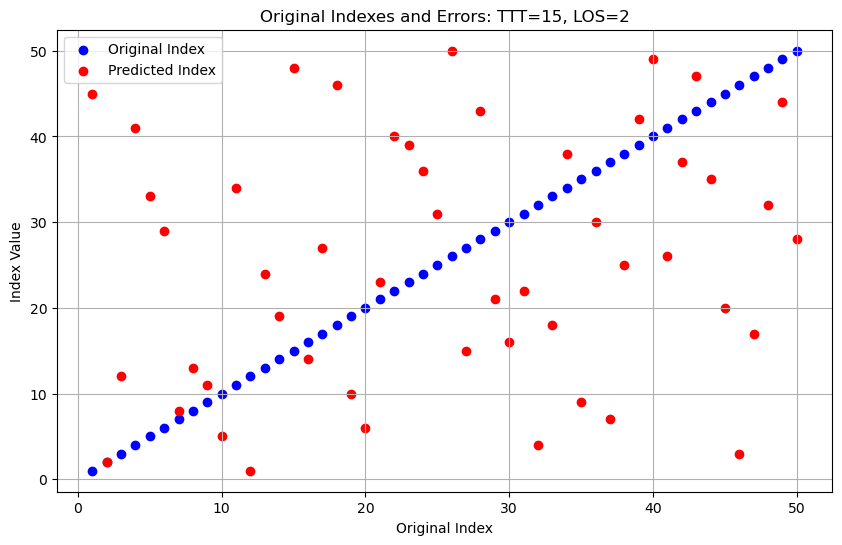

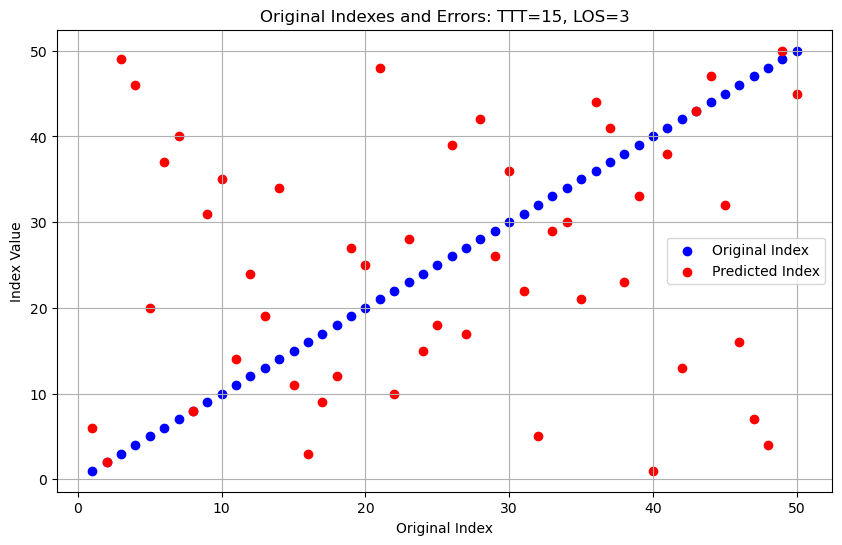

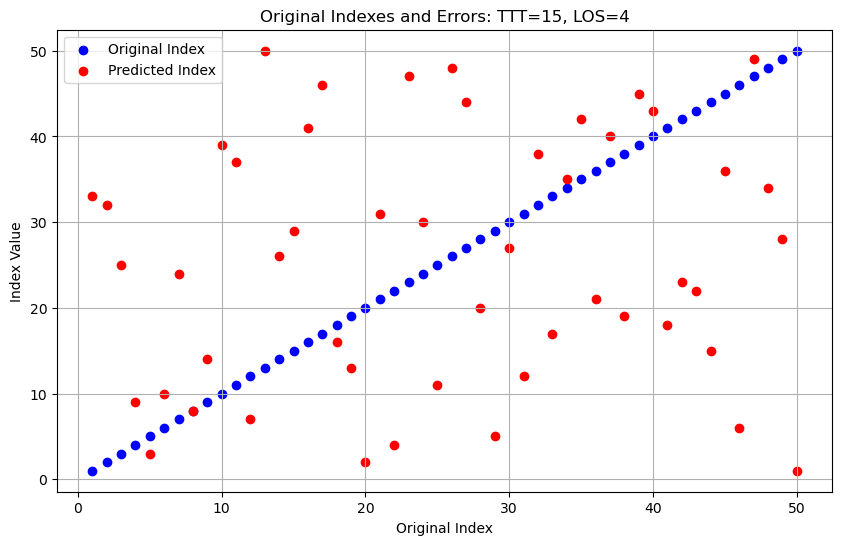

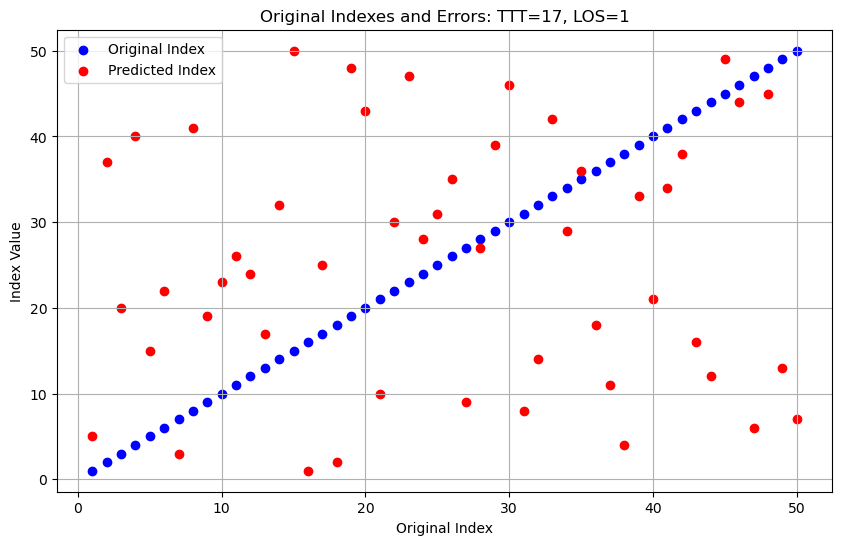

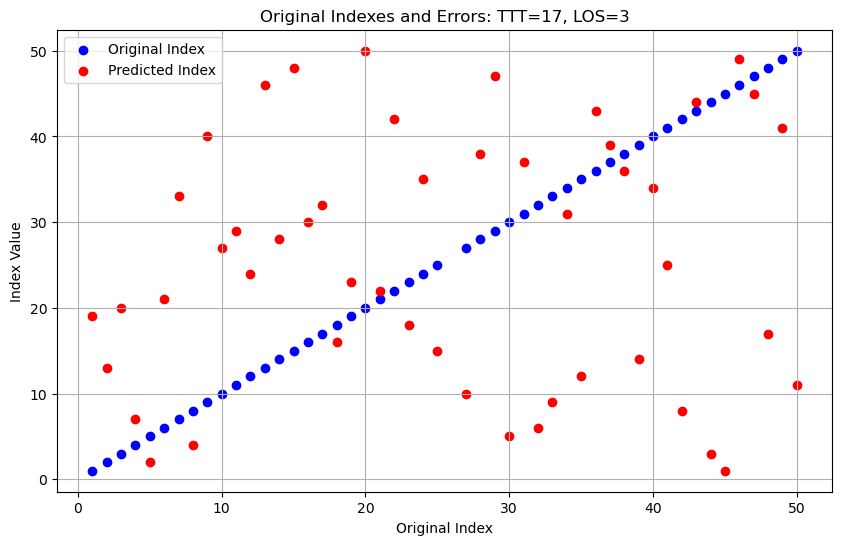

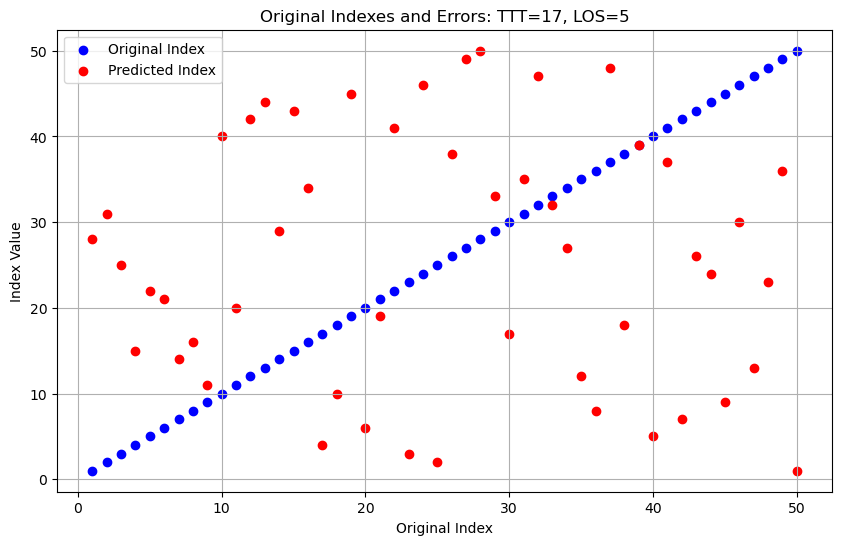

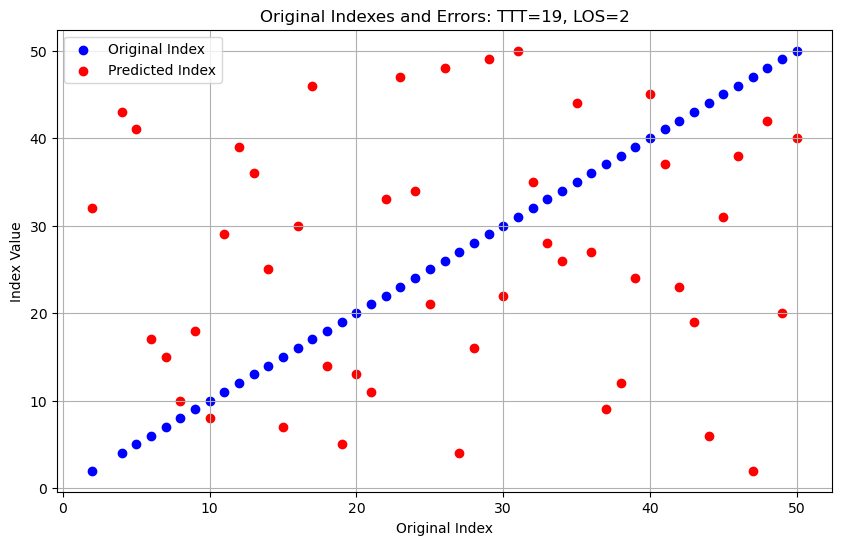

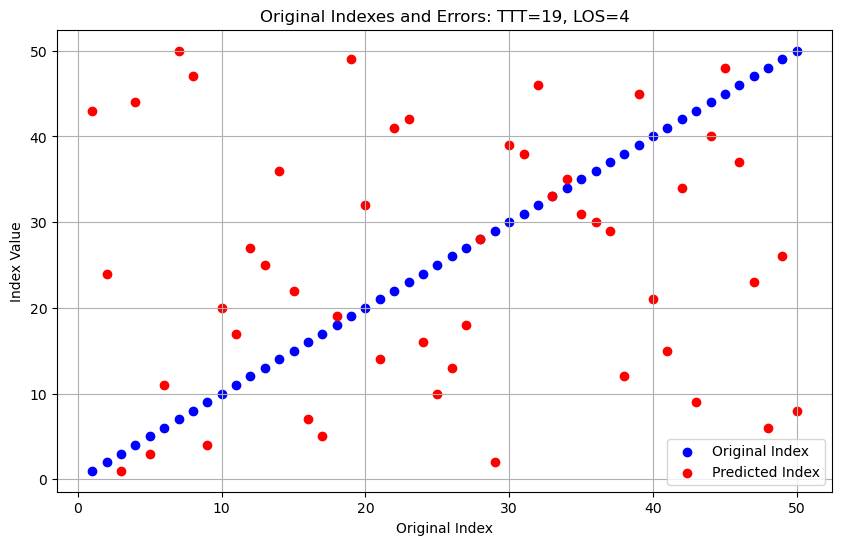

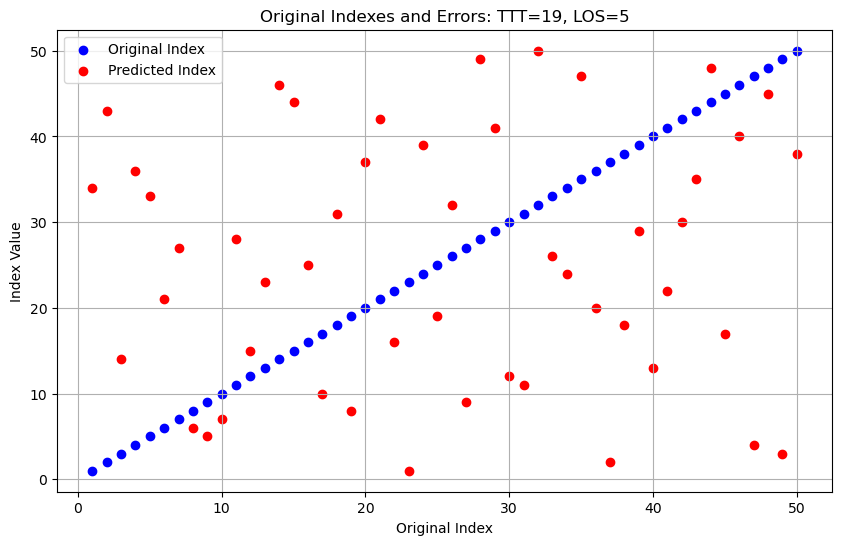

Average Error: 19953.7
Standard Deviation of Errors: 2188.824184351041


In [70]:
import pandas as pd
import numpy as np
import random
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Define feature columns
feature_columns = ['price', 'km_from_center', 'star_rating', 'reviews', 'score', 'location_rating']

# Assuming df is your DataFrame
# Split data into training and test sets based on TTT values
even_ttt = df[df['TTT'] % 2 == 0]
odd_ttt = df[df['TTT'] % 2 != 0]

print(f"sum of EVEN TTT unique groups: {even_ttt.groupby(['TTT', 'LOS']).ngroups}")
print(f"sum of ODD TTT unique groups: {odd_ttt.groupby(['TTT', 'LOS']).ngroups}")

# Select n unique groups for training
train_groups = even_ttt.groupby(['TTT', 'LOS']).size().reset_index().sample(n=50)
train_data = pd.merge(even_ttt, train_groups, on=['TTT', 'LOS'])

# Select n unique groups for testing
test_groups = odd_ttt.groupby(['TTT', 'LOS']).size().reset_index().sample(n=20)
test_data = pd.merge(odd_ttt, test_groups, on=['TTT', 'LOS'])

# Prepare training data for the classifier
train_X = train_data[feature_columns]
train_y = (train_data['index'].diff().shift(-1) < 0).astype(int)

# Standardize the features
scaler = StandardScaler()
train_X = scaler.fit_transform(train_X)

# Prepare the classifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(train_X, train_y)

# Function to predict the order of two hotels
def predict_order(hotel1, hotel2):
    pair = pd.DataFrame([hotel1, hotel2])
    pair = scaler.transform(pair[feature_columns])
    prediction = knn.predict(pair)
    return 1 if prediction[0] else -1

# Function to perform Bubble Sort based on the prediction model
def bubble_sort_hotels(hotels):
    sorted_hotels = hotels.copy()
    n = len(sorted_hotels)
    for i in range(n):
        for j in range(0, n-i-1):
            hotel1 = sorted_hotels.iloc[j]
            hotel2 = sorted_hotels.iloc[j+1]
            if predict_order(hotel1, hotel2) == 1:
                sorted_hotels.iloc[j], sorted_hotels.iloc[j+1] = sorted_hotels.iloc[j+1], sorted_hotels.iloc[j]
    return sorted_hotels

# Calculate the sum of squared index differences
errors = []
all_original_indices = []
all_sorted_indices = []
accuracy_rates = []

for name, group in test_data.groupby(['TTT', 'LOS']):
    original_indices = group['index'].values
    shuffled_group = group.sample(frac=1).reset_index(drop=True)
    sorted_group = bubble_sort_hotels(shuffled_group)
    sorted_indices = sorted_group['index'].values
    error = np.sum((sorted_indices - original_indices)**2)
    errors.append(error)

    # Calculate accuracy
    correct_predictions = sum((sorted_indices[i] < sorted_indices[i+1]) == (original_indices[i] < original_indices[i+1])
                              for i in range(len(sorted_indices) - 1))
    accuracy_rate = correct_predictions / (len(sorted_indices) - 1)
    accuracy_rates.append(accuracy_rate)

    # Plot the original indexes as blue points and the errors as red points for each original index
    plt.figure(figsize=(10, 6))
    plt.scatter(original_indices, original_indices, color='blue', label='Original Index')
    plt.scatter(original_indices, sorted_indices, color='red', label='Predicted Index')
    plt.title(f'Original Indexes and Errors: TTT={group["TTT"].values[0]}, LOS={group["LOS"].values[0]}')
    plt.xlabel('Original Index')
    plt.ylabel('Index Value')
    plt.legend()
    plt.grid(True)
    plt.show()

    all_original_indices.extend(original_indices)
    all_sorted_indices.extend(sorted_indices)

# Calculate the average and standard deviation of errors
avg_error = np.mean(errors)
std_error = np.std(errors)

# Display the results
print(f'Average Error: {avg_error}')
print(f'Standard Deviation of Errors: {std_error}')


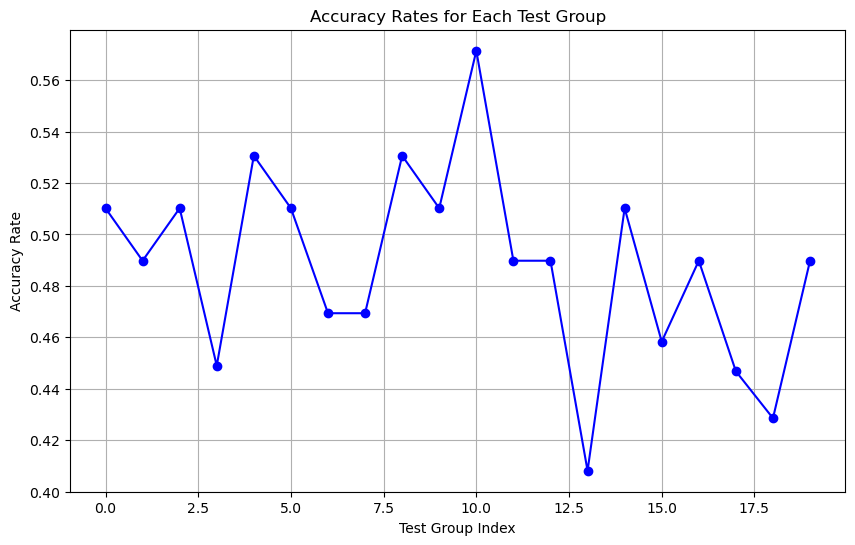

In [72]:
# Plot the overall accuracy rates
plt.figure(figsize=(10, 6))
plt.plot(range(len(accuracy_rates)), accuracy_rates, marker='o', linestyle='-', color='blue')
plt.title('Accuracy Rates for Each Test Group')
plt.xlabel('Test Group Index')
plt.ylabel('Accuracy Rate')
plt.grid(True)
plt.show()